### Correlation

In [ ]:
data_copy = data.copy()
data_copy['Relevance_criteria'] = data_copy['Relevance_criteria'].replace({'Priority': 1, 'Caution': 0, 'Unknown': -1})
data_copy['Gender'] = data_copy['Gender'].replace({'male': 1, 'female': 0})
data_copy['Education'] = data_copy['Education'].replace({'High School': 1, 'Degree': 2, 'BSc Degree': 3, 'MSc Degree': 4})

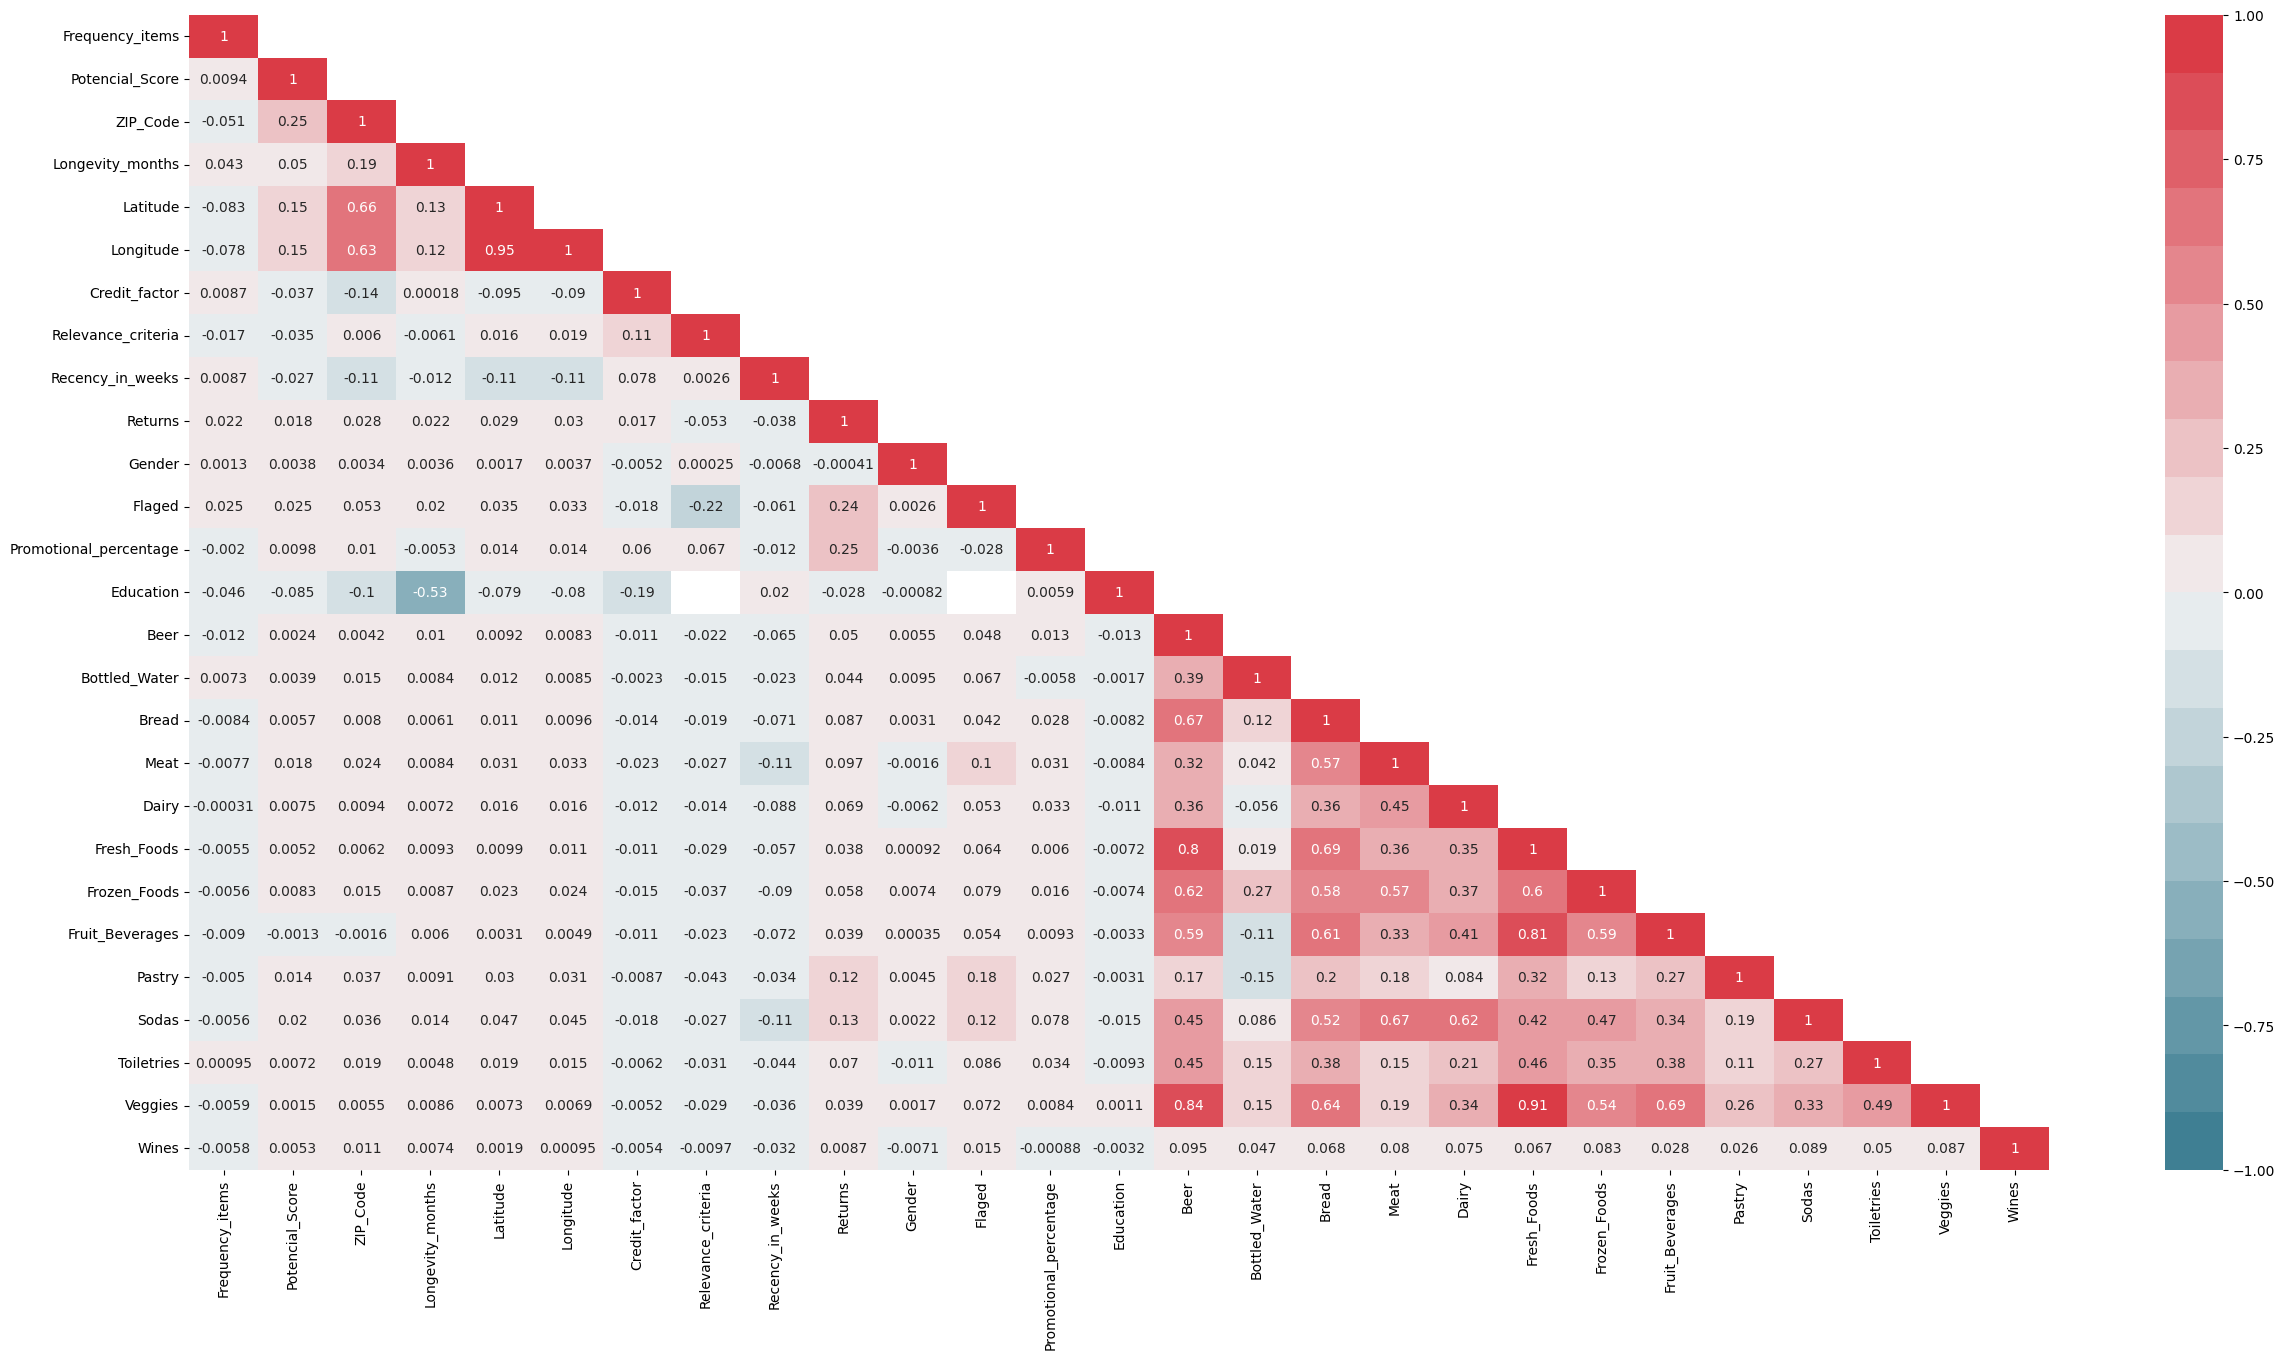

In [ ]:
plot_correlation_matrix(data_copy.iloc[:, 1:], 'pearson')

Highly correlated variables:
- Fresh Foods & Veggies (0.91)
- Fresh Foods & Fruit Beverages (0.81)
- Fresh Foods % Beer (0.8)
- Beer & Veggies (0.84)

# Correlation

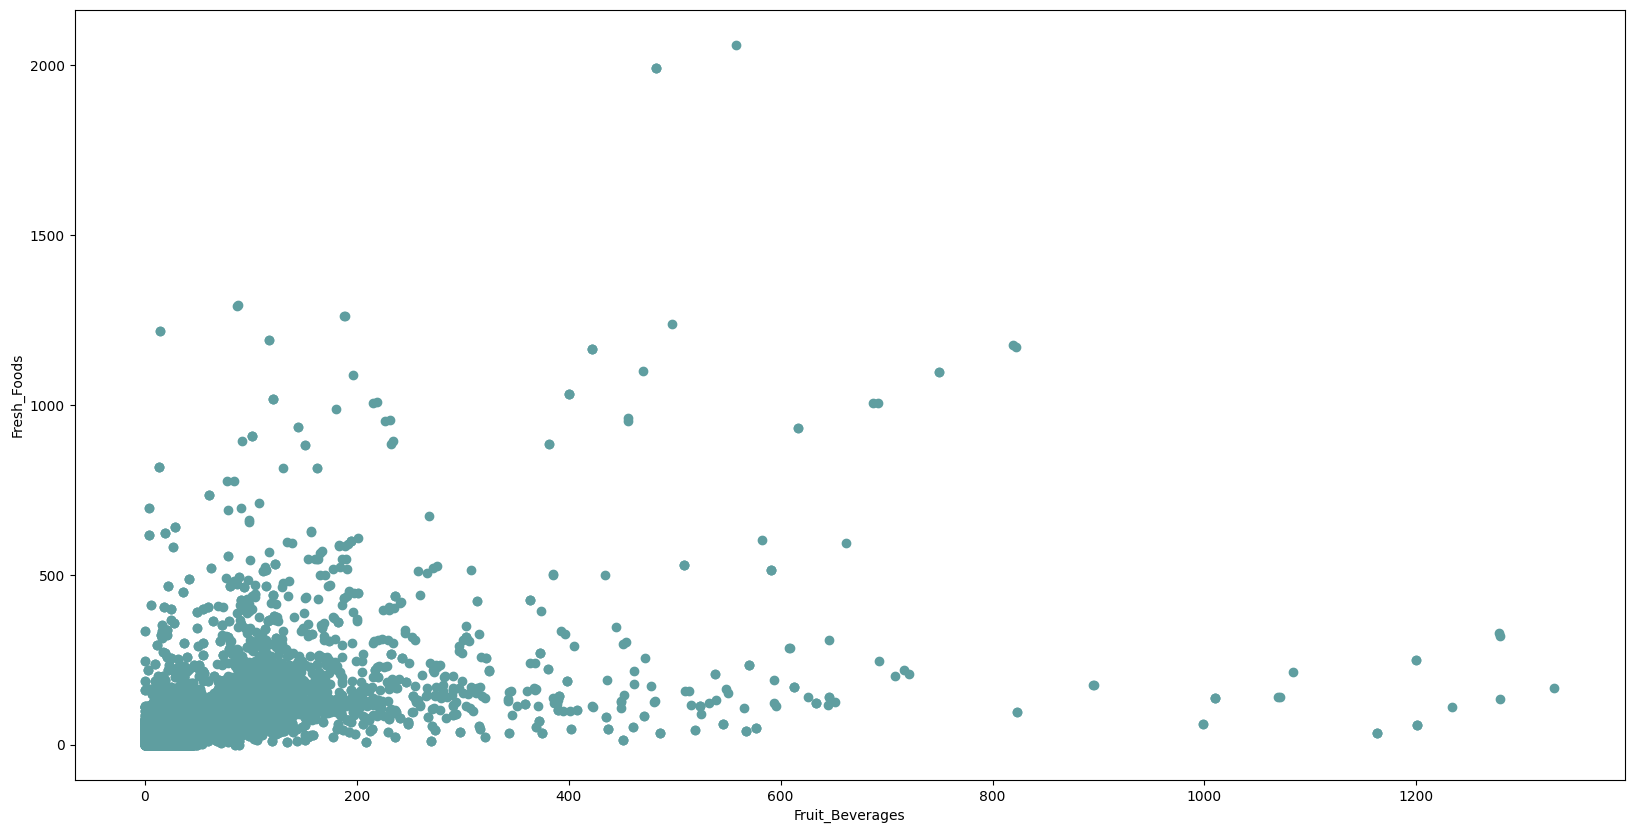

In [ ]:
plot_scatter(plt.subplots()[1], data_imputed, 'Fruit_Beverages', 'Fresh_Foods')

In [ ]:
thresholds = {
    'beer': (26, 530),
    'bottled_water': (26, 396),
    'bread': (3, 434),
    'meat': (0, 1970),
    'dairy': (18, 2783),
    'fresh_foods': (0, 719),
    'frozen_foods': (0, 1015),
    'fruit_beverages': (0, 572),
    'pastry': (18, 579),
    'sodas': (0, 1545),
    'toiletries': (0, 141),
    'veggies': (0, 625),
    'wines': (0, 247),
    'promotional_percentage': (0, 720)
}

outliers_condition = pd.concat([(data[col] < thresholds[col][0]) | (data[col] > thresholds[col][1]) for col in thresholds], axis=1).any(axis=1)

outliers = data[outliers_condition]
data = data[~outliers_condition]

outliers

,id_client,frequency_items,potencial_score,zip_code,longevity_months,credit_factor,relevance_criteria,recency_in_weeks,returns,flaged,...,meat,dairy,fresh_foods,frozen_foods,fruit_beverages,pastry,sodas,toiletries,veggies,wines
41,11752710MIN6NKID776,17,81.30,8.0,13.0,1.0,Priority,19,0.0,1.0,...,0,93,162,61.0,20,27,65,25,2300,0
78,10649719ROP14NKID340,63,79.01,8.0,1.0,0.7,Caution,7,101.0,1.0,...,0,88,71,42.0,25,622,89,88,74,38
106,8351286CRE7NKID785,51,79.33,8.0,13.0,1.0,Priority,16,548.0,1.0,...,0,88,62,37.0,20,45,68,16,1193,0
216,9348573NAM10NKID564,53,80.79,8.0,9.0,0.0,Priority,11,403.0,0.0,...,2536,909,512,1827.0,304,26,3078,1,17,8
229,8151412LEG8NKID833,54,79.34,8.0,17.0,0.5,Priority,15,108.0,0.0,...,0,90,55,93.0,17,204,199,169,201,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123290,8559119AVE9NKID697,35,-0.30,0.0,19.0,0.0,Priority,7,0.0,0.0,...,305,1041,229,452.0,226,34,485,23,10,3
123324,9747943FEG11NKID785,49,79.32,8.0,6.0,0.7,Priority,10,0.0,0.0,...,169,102,56,309.0,119,34,57,23,43,257
123344,12355095GHO7NKID524,52,1.80,NaN,8.0,0.7,Priority,12,NaN,0.0,...,76,101,285,364.0,608,45,100,7,129,0
123345,12355095GHO7NKID820,48,1.80,0.0,3.0,0.7,Priority,11,NaN,0.0,...,76,101,283,290.0,609,127,99,5,123,0


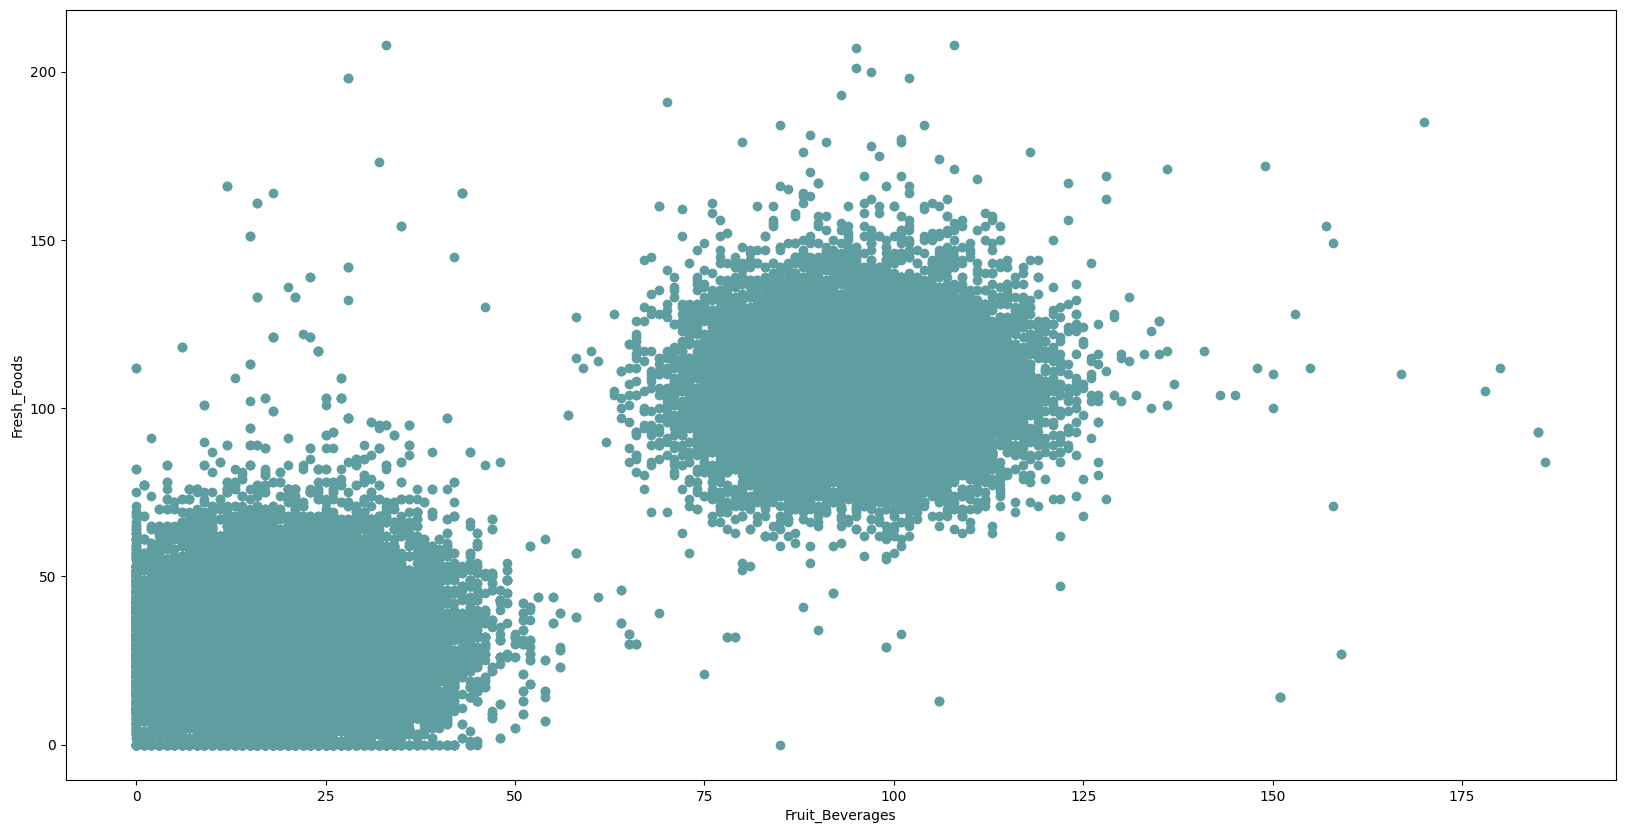

In [ ]:
plot_scatter(plt.subplots()[1], data_no_outliers_iqr, 'Fruit_Beverages', 'Fresh_Foods')

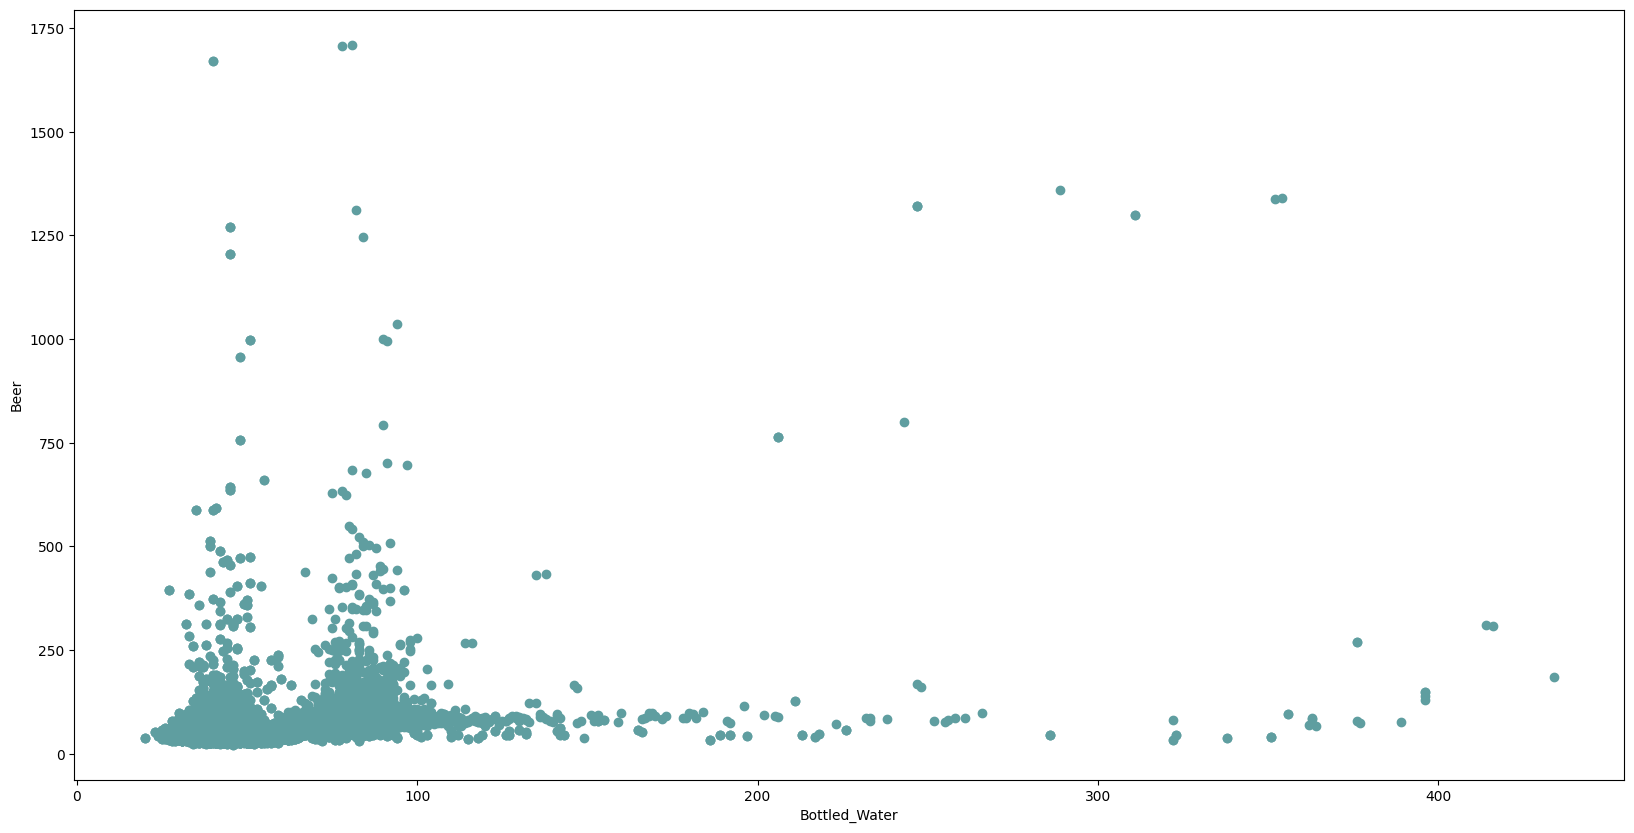

In [ ]:
plot_scatter(plt.subplots()[1], data_imputed, 'Bottled_Water', 'Beer')

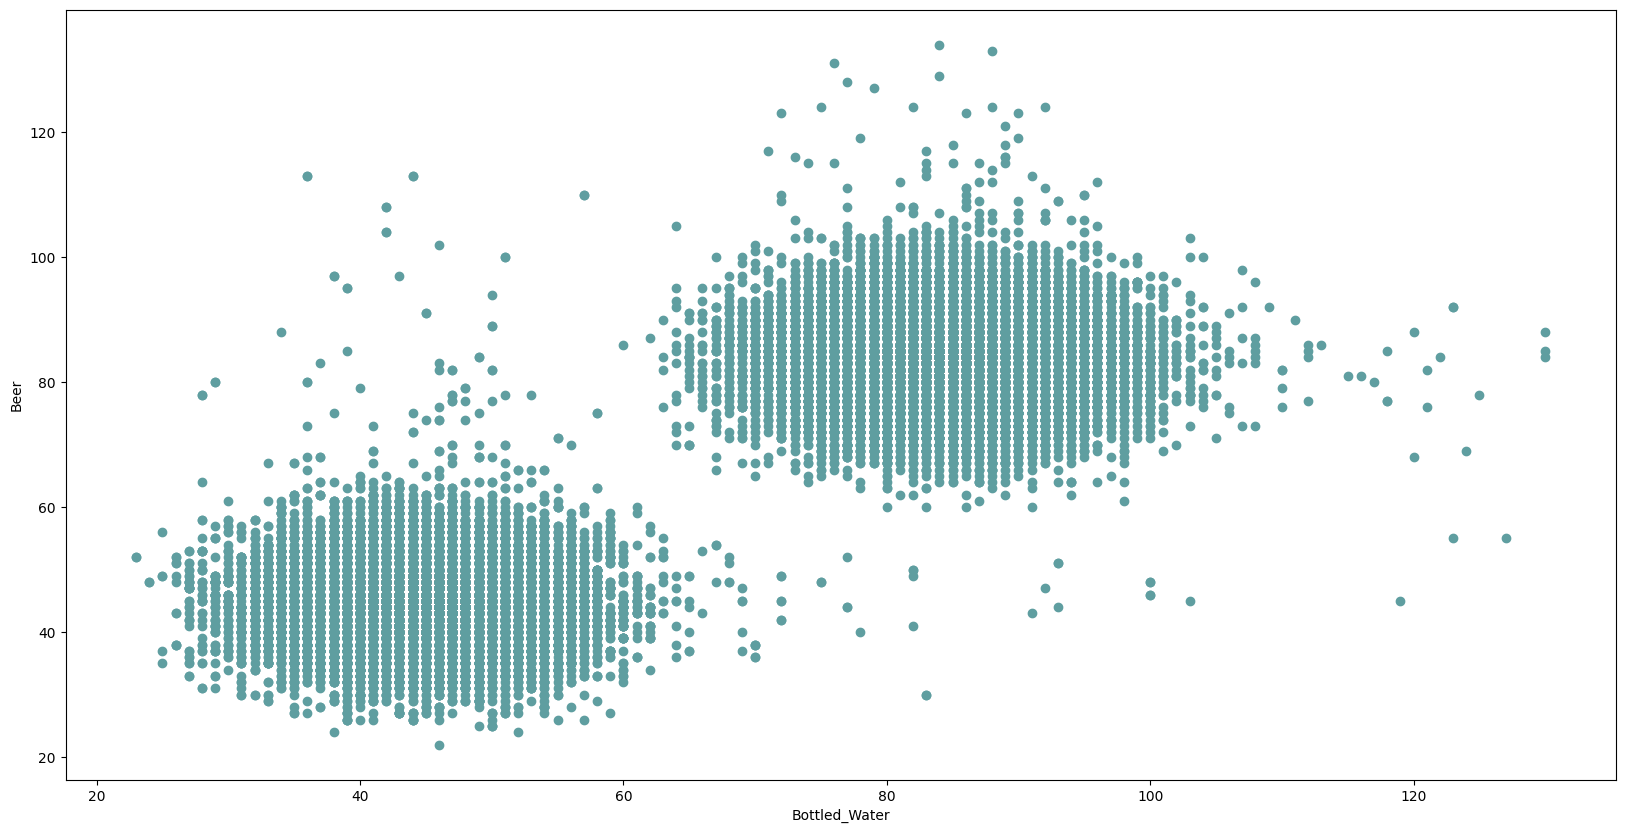

In [ ]:
plot_scatter(plt.subplots()[1], data_no_outliers_iqr, 'Bottled_Water', 'Beer')

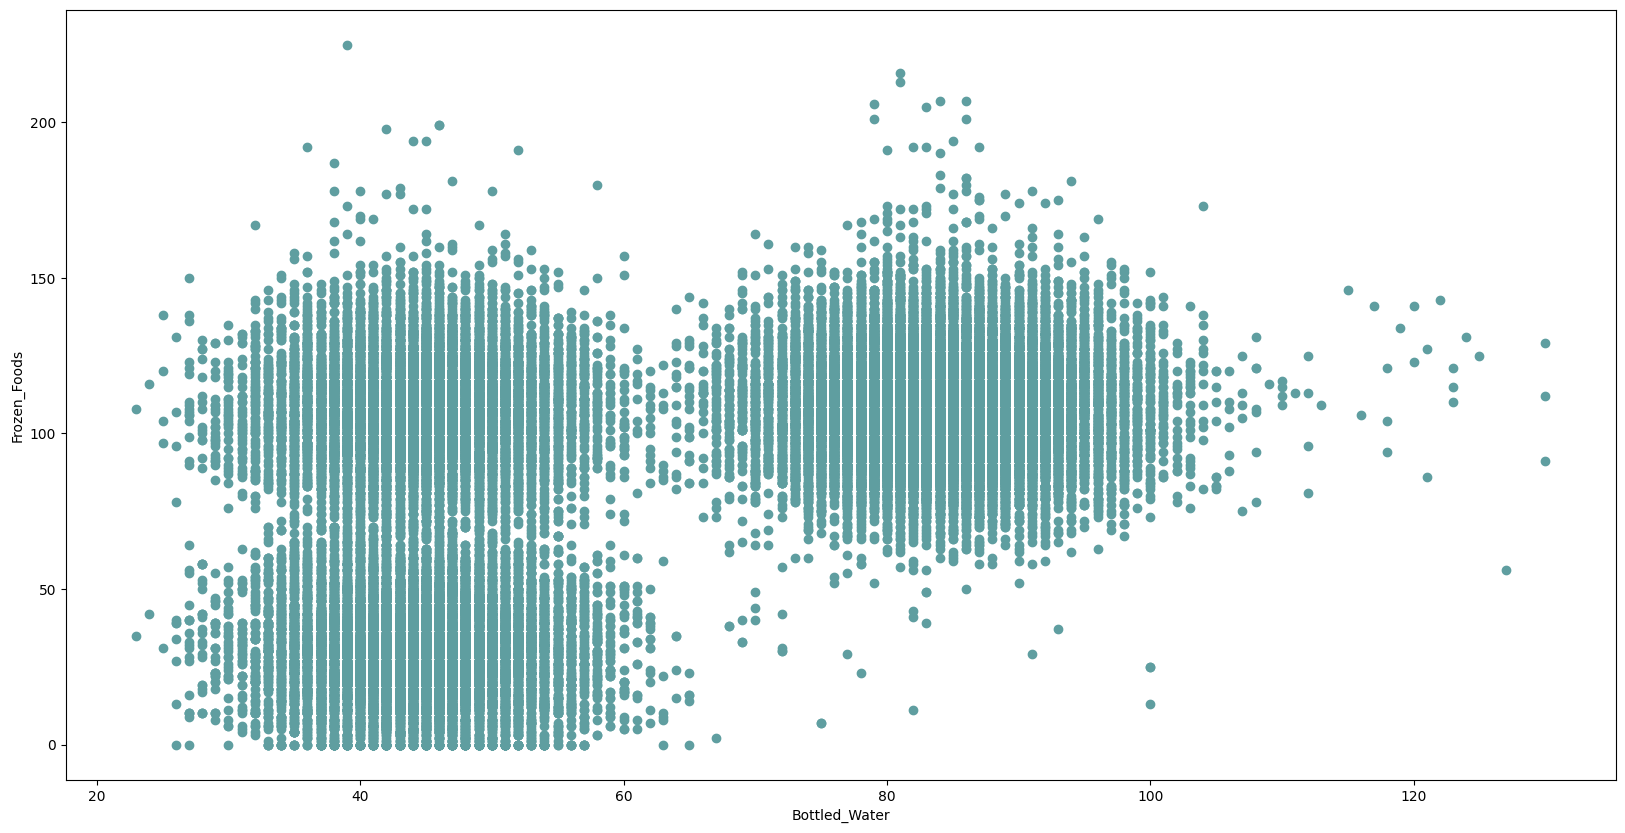

In [ ]:
plot_scatter(plt.subplots()[1], data_no_outliers_iqr, 'Bottled_Water', 'Frozen_Foods')

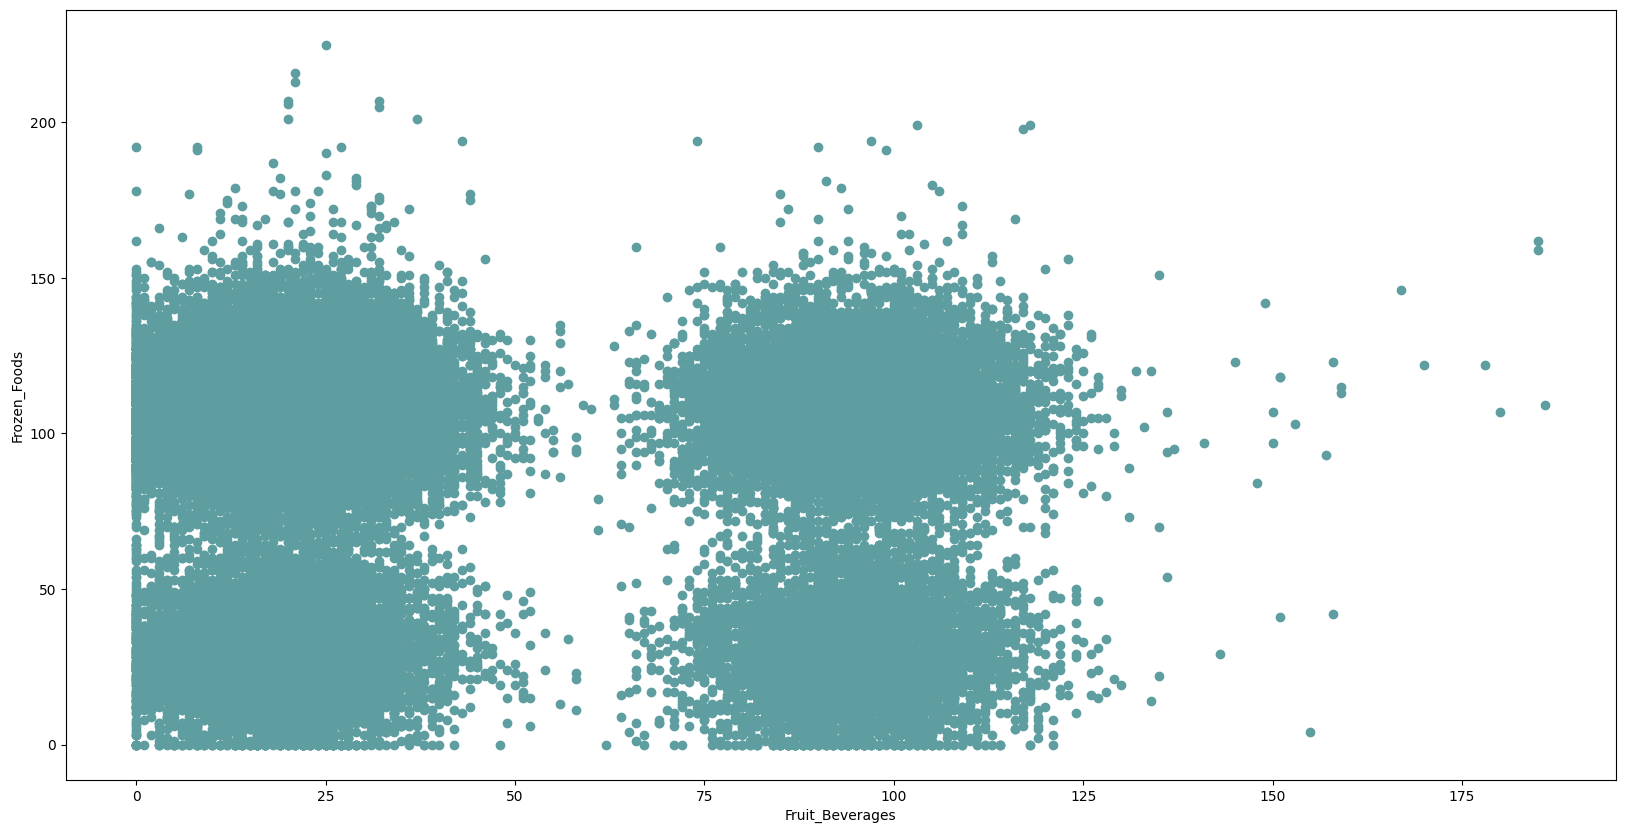

In [ ]:
plot_scatter(plt.subplots()[1], data_no_outliers_iqr, 'Fruit_Beverages', 'Frozen_Foods')

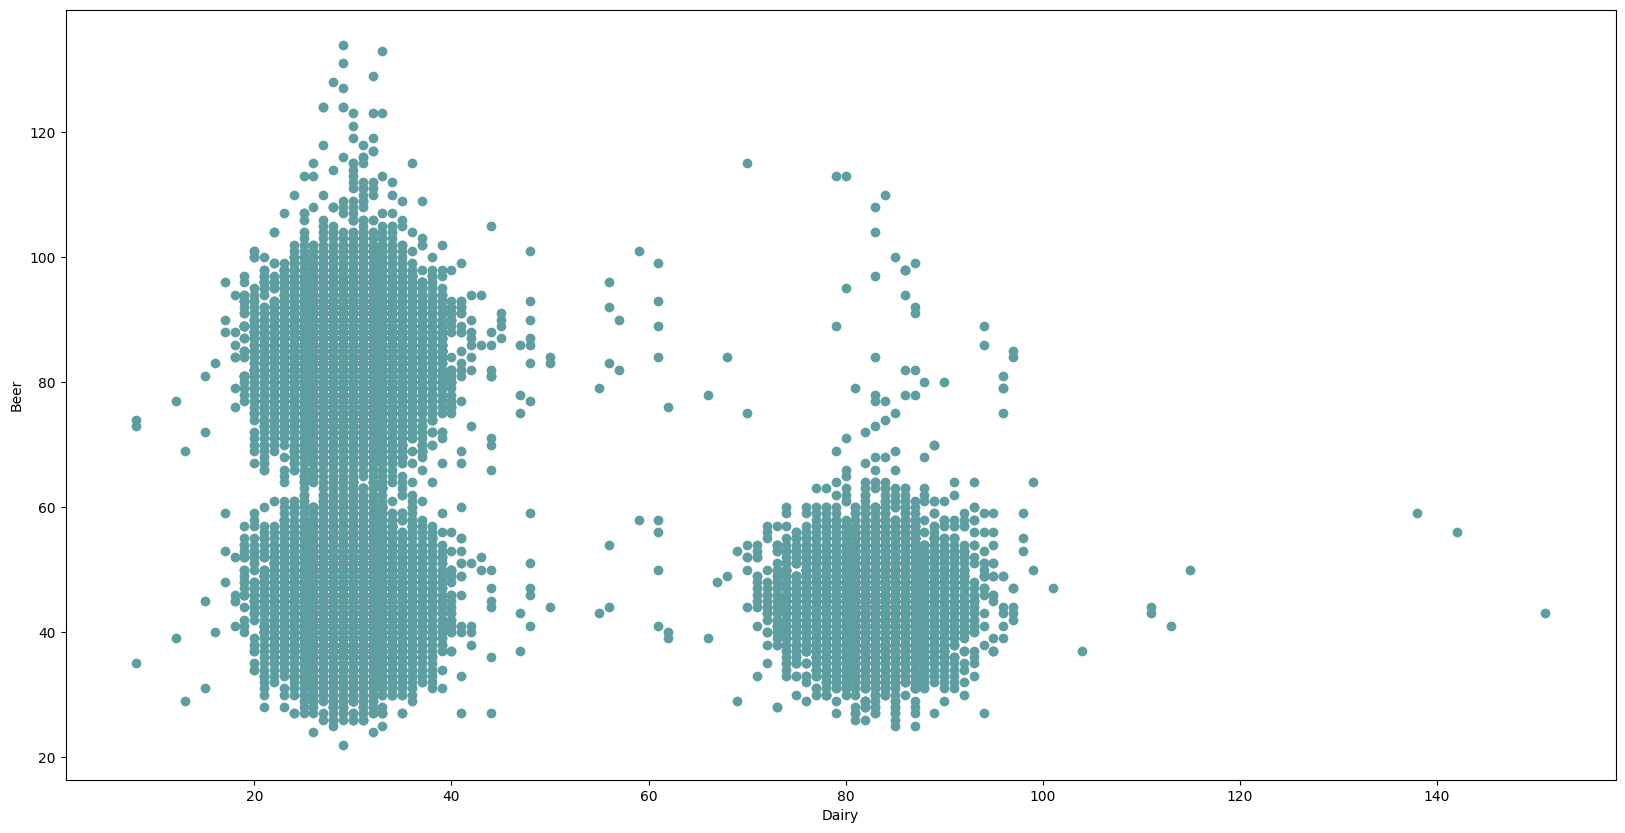

In [ ]:
plot_scatter(plt.subplots()[1], data_no_outliers_iqr, 'Dairy', 'Beer')

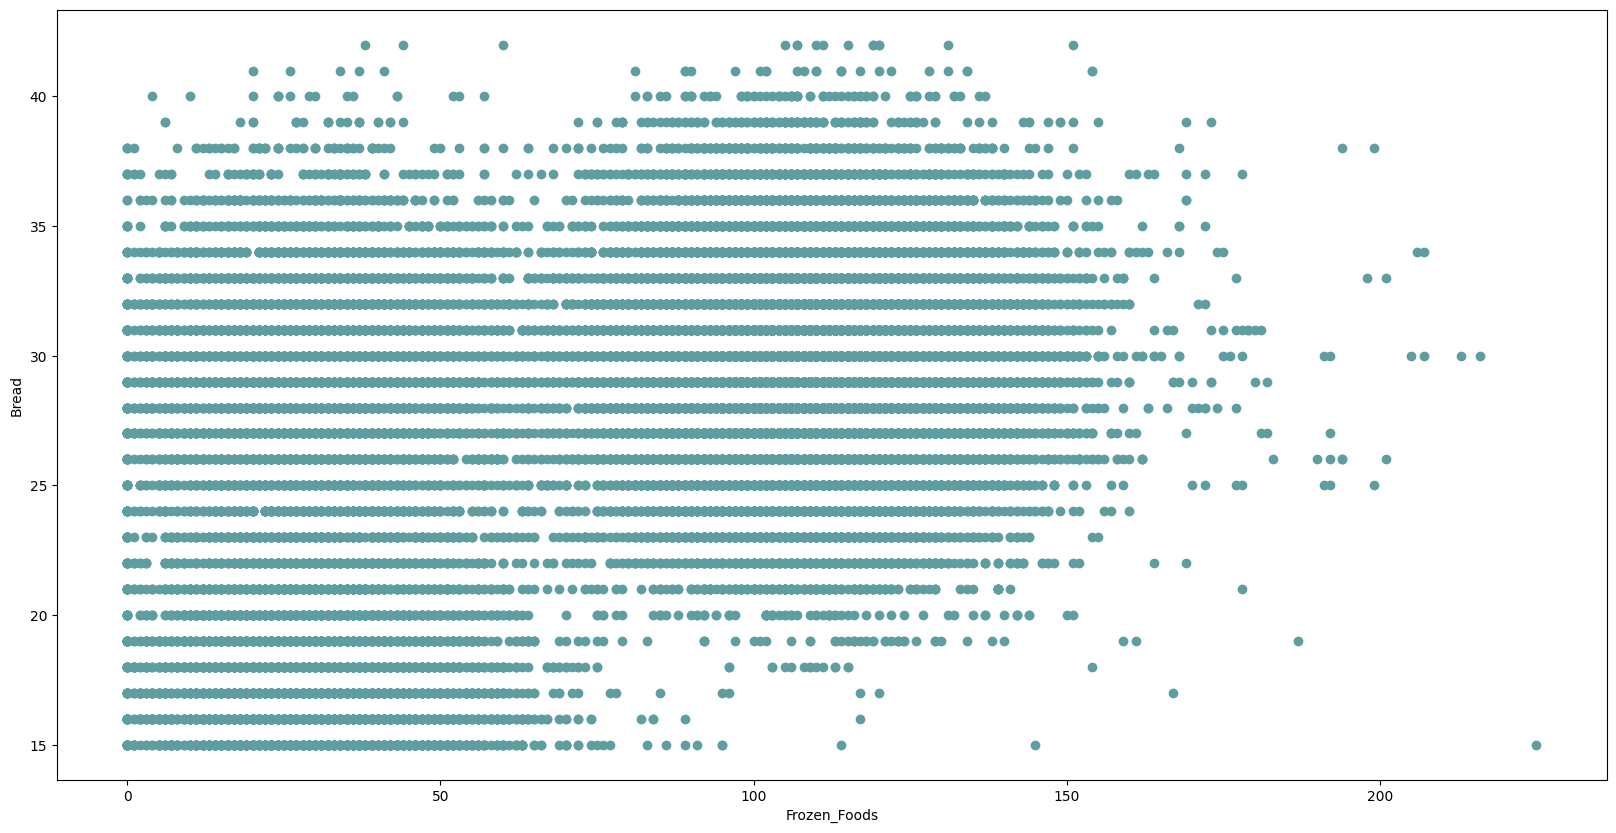

In [ ]:
plot_scatter(plt.subplots()[1], data_no_outliers_iqr, 'Frozen_Foods', 'Bread')

# Data Visualization 2
<a id='dataviz2'></a>


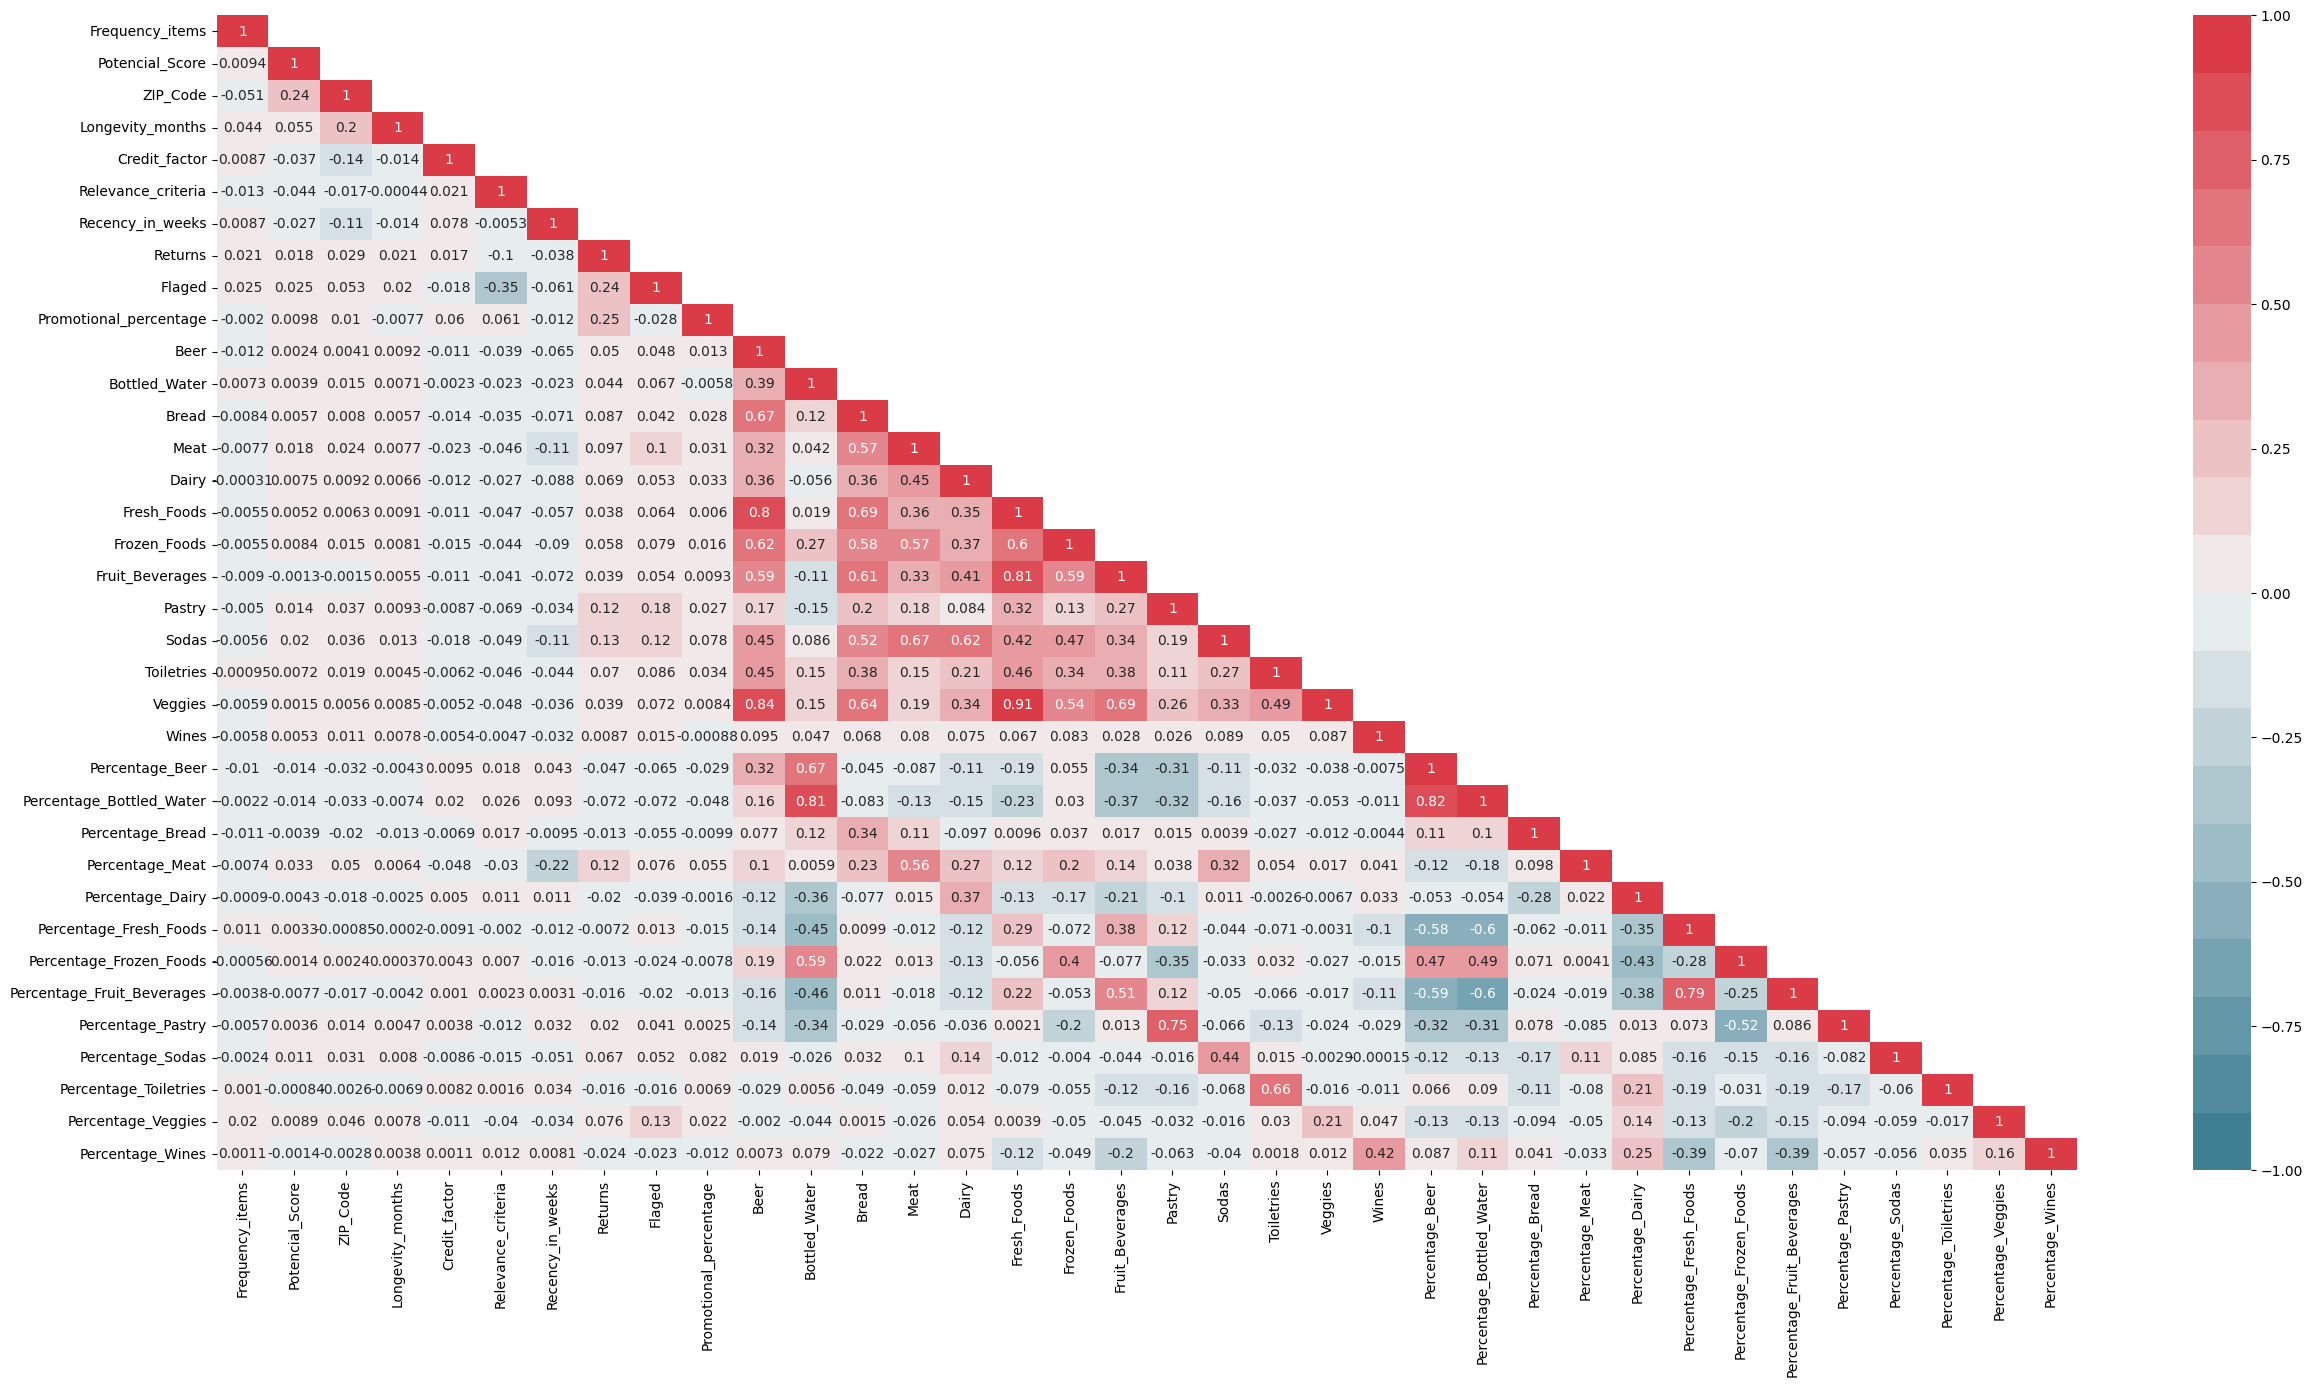

In [ ]:
plot_correlation_matrix(data_imputed.iloc[:, 1:], 'pearson')

In [ ]:
# Perform standard scaling on the numerical columns
data_no_outliers_iqr_st_scl = StandardScaler().fit_transform(data_no_outliers_iqr.iloc[:, 1:])

# Create a new DataFrame with the scaled values
data_no_outliers_iqr_st_scl = pd.DataFrame(data_no_outliers_iqr_st_scl, columns=data_no_outliers_iqr.iloc[:, 1:].columns, index=data_no_outliers_iqr.index)

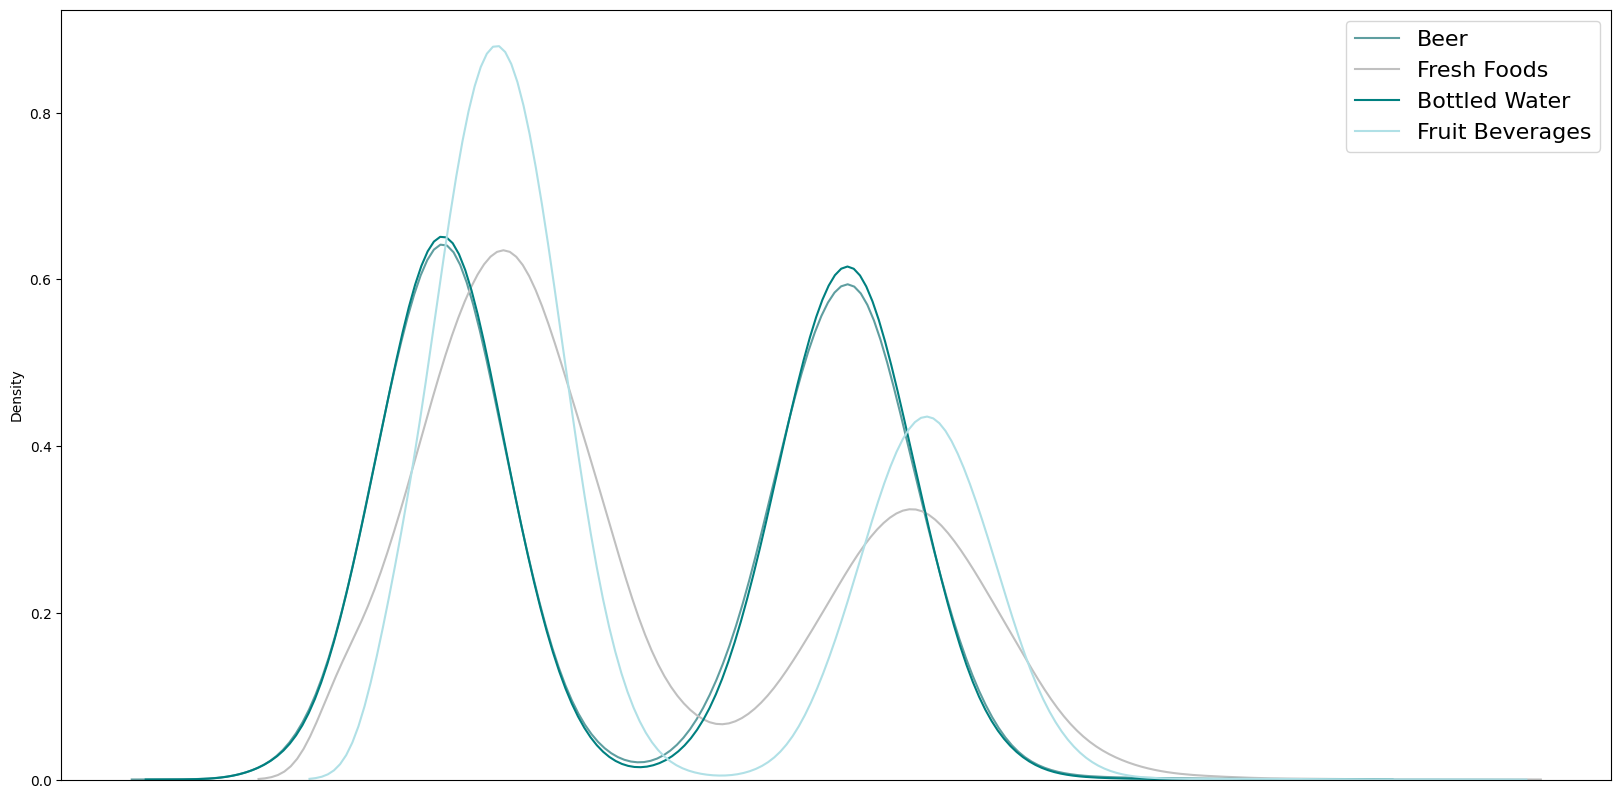

In [ ]:
# Create KDE plots for the scaled numerical columns
sns.kdeplot(data_no_outliers_iqr_st_scl.Beer, color='cadetblue')
sns.kdeplot(data_no_outliers_iqr_st_scl.Fresh_Foods, color='silver')
sns.kdeplot(data_no_outliers_iqr_st_scl.Bottled_Water, color='teal')
sns.kdeplot(data_no_outliers_iqr_st_scl.Fruit_Beverages, color='powderblue')

# Set the legend and label the x-axis
plt.legend(['Beer', 'Fresh Foods', 'Bottled Water', 'Fruit Beverages'], fontsize=16)
plt.gca().set_xticks([])
plt.xlabel('')

# Display the plot
plt.show()

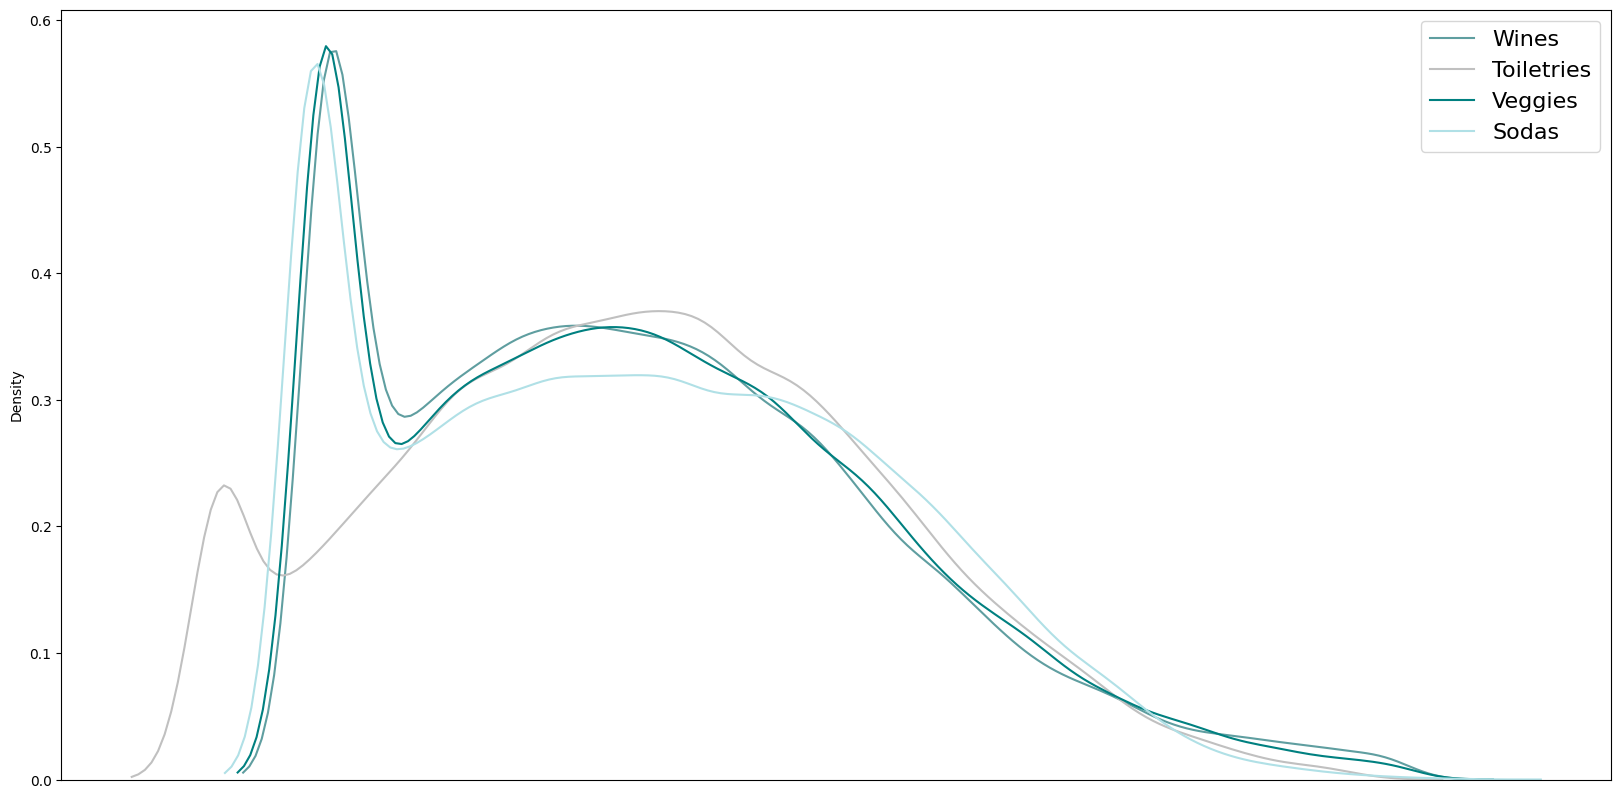

In [ ]:
# Create KDE plots for the scaled numerical columns
sns.kdeplot(data_no_outliers_iqr_st_scl.Wines, color='cadetblue')
sns.kdeplot(data_no_outliers_iqr_st_scl.Toiletries, color='silver')
sns.kdeplot(data_no_outliers_iqr_st_scl.Veggies, color='teal')
sns.kdeplot(data_no_outliers_iqr_st_scl.Sodas, color='powderblue')

# Set the legend and label the x-axis
plt.legend(['Wines', 'Toiletries', 'Veggies', 'Sodas'], fontsize=16)
plt.gca().set_xticks([])
plt.xlabel('')

# Display the plot
plt.show()

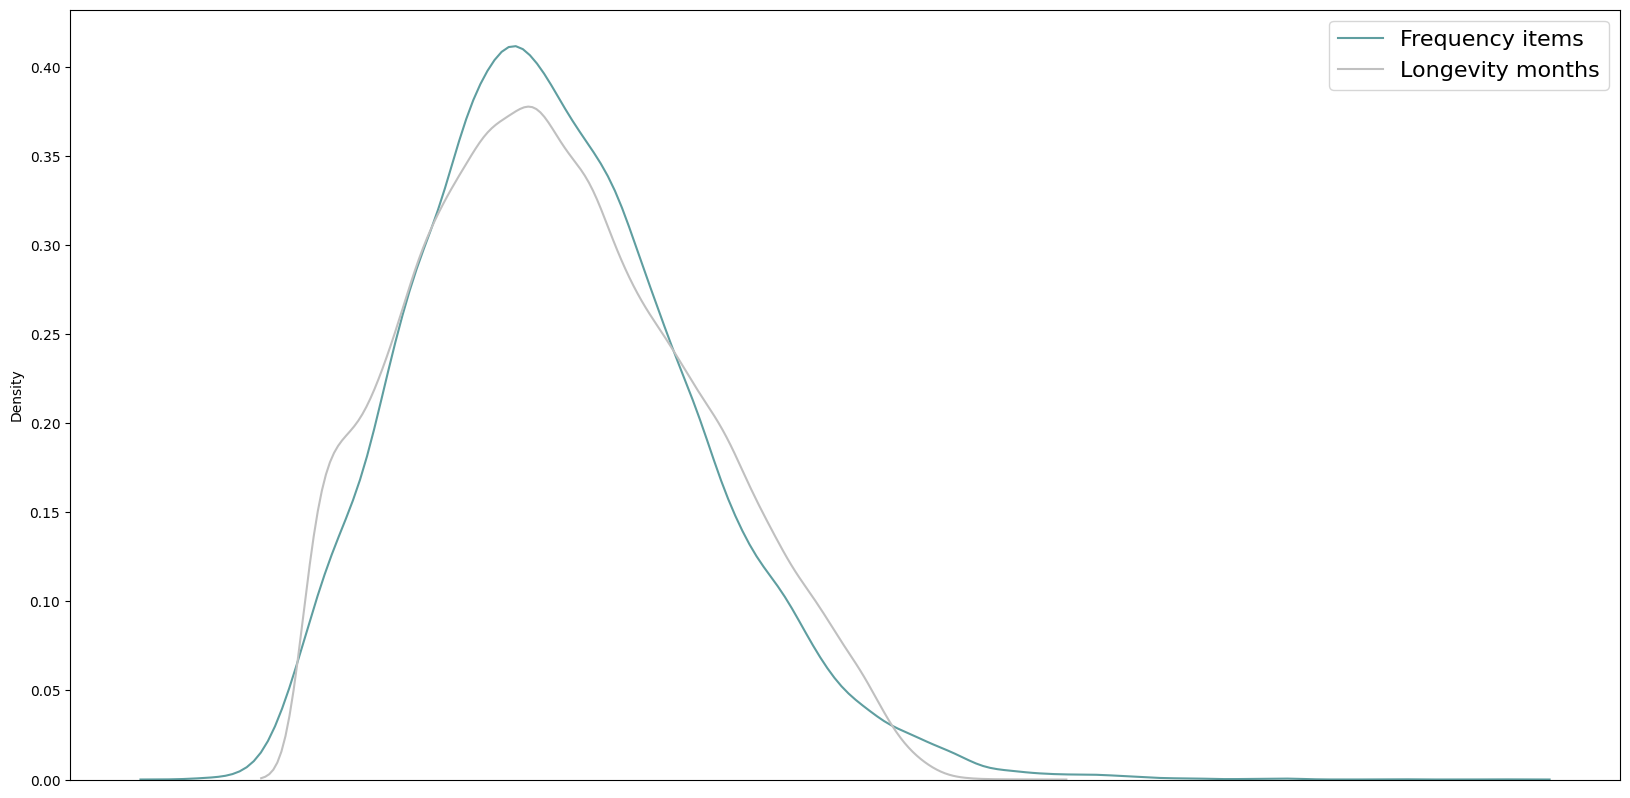

In [ ]:
# Create KDE plots for the scaled numerical columns
sns.kdeplot(data_no_outliers_iqr_st_scl.Frequency_items, color='cadetblue')
sns.kdeplot(data_no_outliers_iqr_st_scl.Longevity_months, color='silver')


# Set the legend and label the x-axis
plt.legend(['Frequency items', 'Longevity months'], fontsize=16)
plt.gca().set_xticks([])
plt.xlabel('')

# Display the plot
plt.show()

# Duvidas
<a id='duvidas'></a>

1. Podemos assumir que quem tem null na educação é porque não tem educação?
    - ou podemos imputa-la com base nos IDs?

2. As nossas ultimas rows (297) têm o valor de todas as spent amounts a 0. Podemos apagalas?

3. Relevance Criteria tem valores de 'Unknown', isso pode ser considerado uma categoria, ou eles têm mesmo de pertencer a uma das duas categorias 'Priority' / 'Caution'?

3. Colunas de percentagem (Potencial Score e Credit Factor): Os valores vão mesmo de -100 a 100 (para potencial score) e 0 a 100 (para credit factor) ou é suposto terem sido convertidos para valores de -1 a 1 e 0 a 1, respetivamente?

4. Valores irreais em variaveis calculadas por outros modelos podem ser convertidos para o valor aceitável mais proximo? Por exemplo, para o Potencial Score, podemos assumir que o modelo foi incorretamente feito com uma regressão linear que permite valores acima de 100 e que portanto o valor deveria ser convertido para 100?

5. Os valores da coluna Flagged que são 2, é para por NaN, certo? Não faz sentido converter para 1, ou faz?

6. Valores negativos em categorias de produtos são returns. Ou seja, são valores de compras de 2022 que foram devolvidas em 2023, certo? Ou seja, se eu comprei 20 euros em vinho em 2022 e os devolvi em 2023, considerando que não comprei mais vinho em 2023, o valor dessa categoria fica a -20, certo?

7. Valores negativos da coluna returns são considerados erros, ou têm alguma interpretação?

8. Se tivermos rows com valores negativos em algumas categorias de produtos e 0 na coluna das returns, é uma inconsistência, certo? 

# Extras
<a id='extras'></a>

In [ ]:
# SOMAR OS VALORES NEGATIVOS DOS SPENT AMOUNTS E COLOCAR EM MODULO NA COLUNA RETURNS
# Identify rows where Returns are 0 and there are negative values in any of the spent_amounts
rows_with_neg_values = data[(data['Returns'] == 0) & (data[spent_amounts] < 0).any(axis=1)]

# Iterate over these rows and update the Returns column
for index, row in rows_with_neg_values.iterrows():
    # Sum the negative values, turn it into a positive value
    negative_sum = row[spent_amounts][row[spent_amounts] < 0].sum() * -1
    # Update the Returns column
    data.at[index, 'Returns'] = negative_sum

# Display the updated rows to verify
data.loc[rows_with_neg_values.index, ['Returns'] + spent_amounts]

,Returns,Beer,Bottled_Water,Bread,Meat,Dairy,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines
1,12,46,58,14,7,90,134,26.0,20,31,-12,2,18,2
2,19,39,57,17,0,89,39,-6.0,25,32,17,33,26,-13
3,2,50,41,17,0,89,26,66.0,16,29,31,28,-2,8
4,2,43,46,13,0,90,-2,57.0,27,45,46,19,23,9
12,7,51,49,25,0,89,11,38.0,22,33,-7,20,105,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123370,7,51,48,29,1,100,88,151.0,117,109,124,7,-7,11
123373,6,51,48,29,1,100,88,234.0,109,26,94,20,-6,6
123379,2,39,37,12,6,100,42,50.0,33,25,70,22,-2,31
123383,11,61,48,13,9,100,61,41.0,26,25,27,23,11,-11


Outliers:

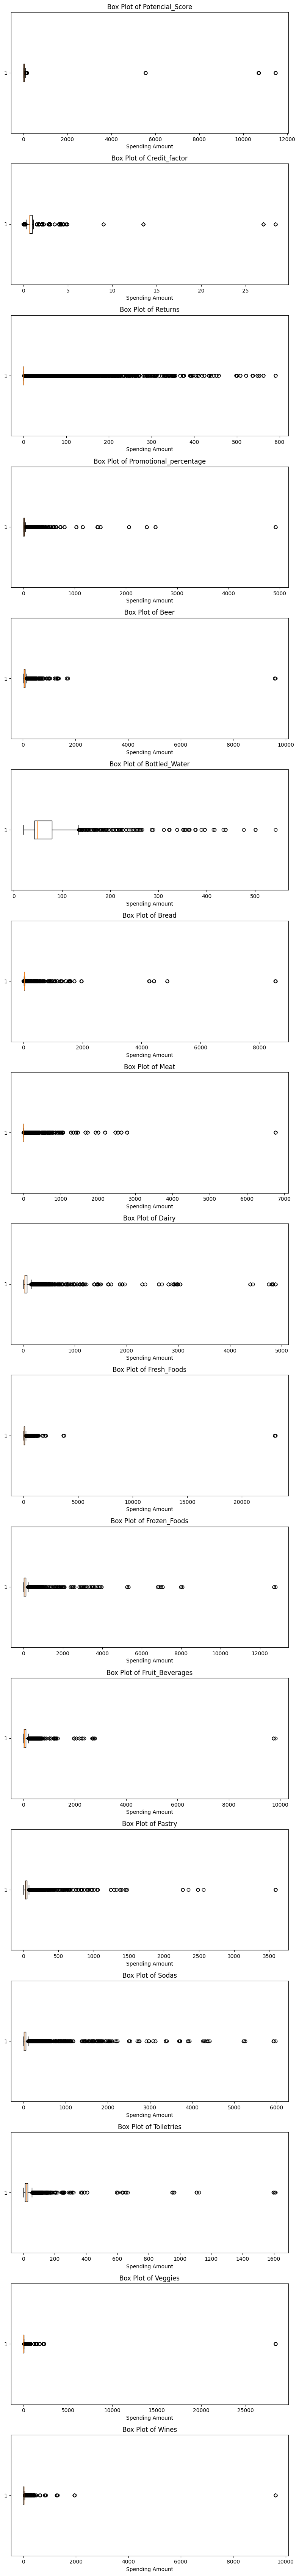

In [ ]:
n_cols = len(outlier_columns)

# Create subplots
fig, axes = plt.subplots(nrows=n_cols, ncols=1, figsize=(8, 4 * n_cols), sharex=False)

# Plot each boxplot on its own axis
for i, col in enumerate(outlier_columns):
    axes[i].boxplot(data_imputed[col], vert=False)
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel('Spending Amount')

# Adjust layout
plt.tight_layout()
plt.show()

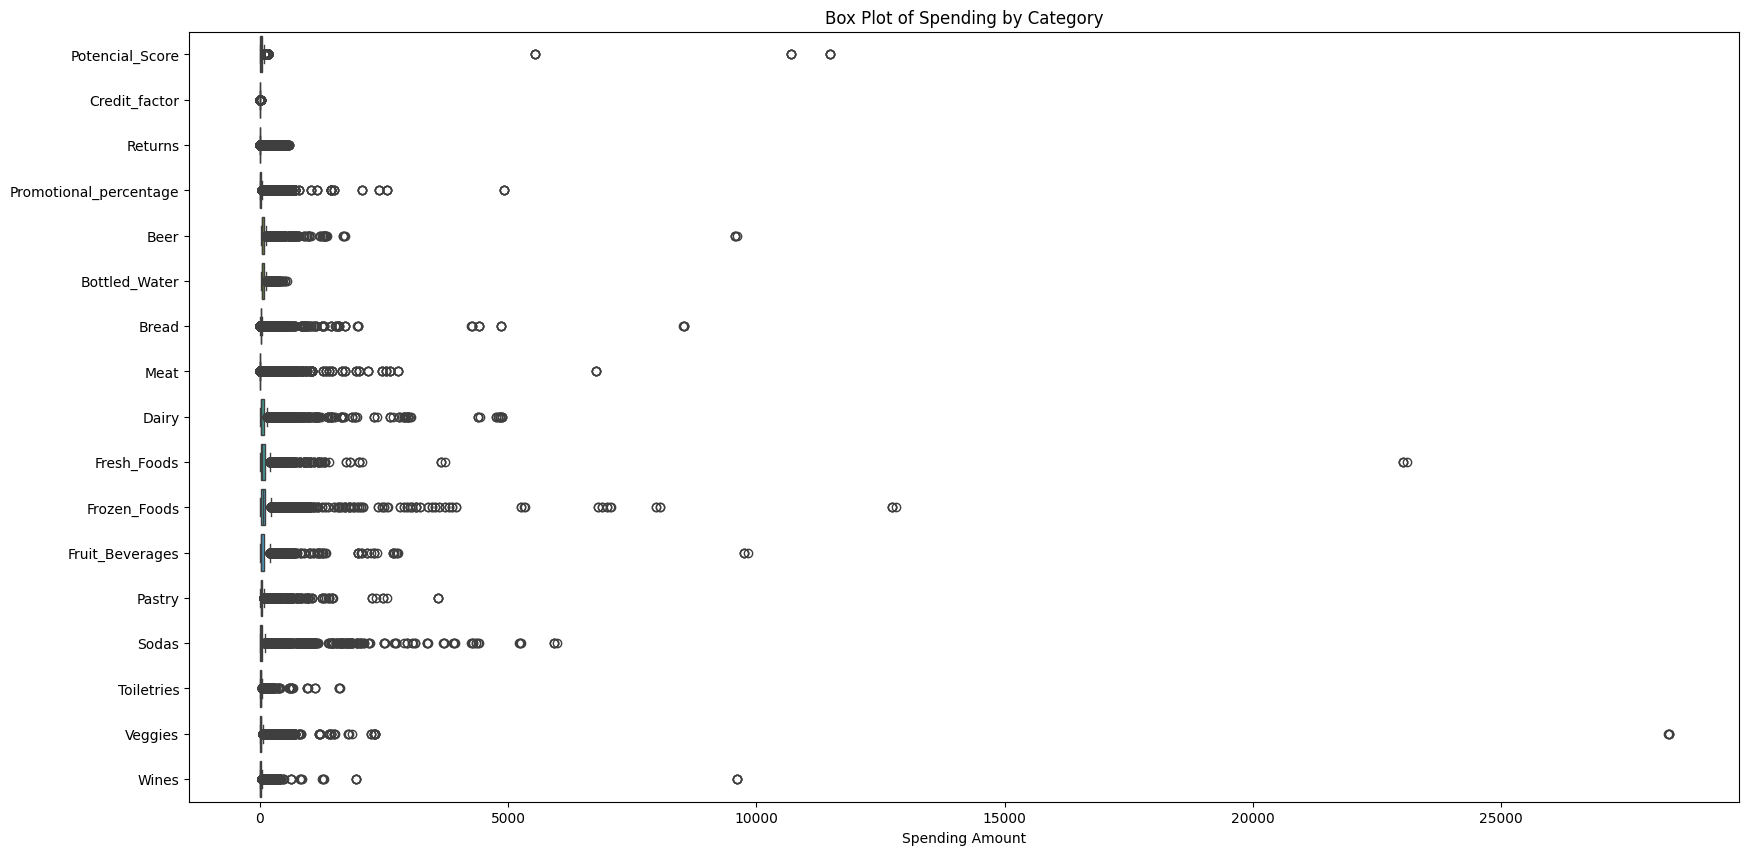

In [ ]:
data_imputed_out = data[outlier_columns]

sns.boxplot(data=data_imputed_out, orient='h')

# Add labels
plt.title('Box Plot of Spending by Category')
plt.xlabel('Spending Amount')

# Show the plot
plt.show()

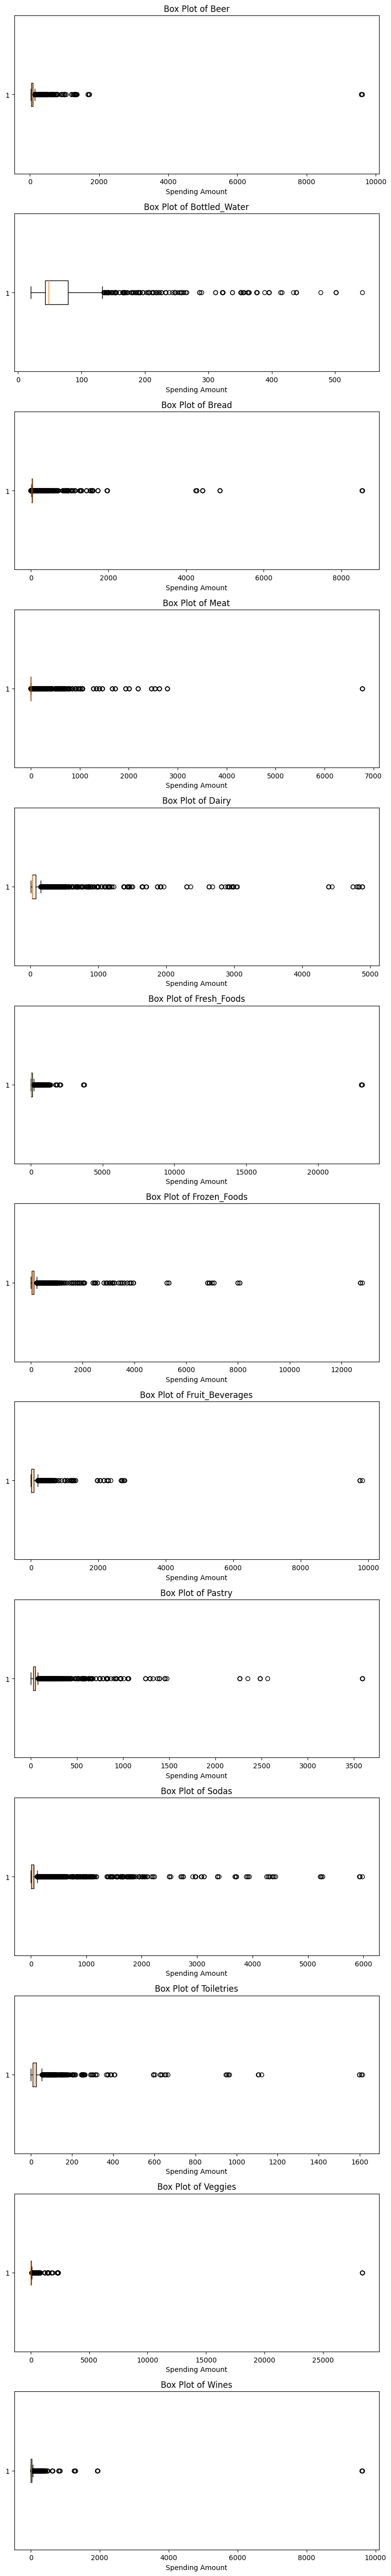

In [ ]:
# import matplotlib.pyplot as plt

# Number of columns
n_cols = len(data_imputed_spends.columns)

# Create subplots
fig, axes = plt.subplots(nrows=n_cols, ncols=1, figsize=(8, 4 * n_cols), sharex=False)

# Plot each boxplot on its own axis
for i, col in enumerate(data_imputed_spends.columns):
    axes[i].boxplot(data_imputed_spends[col], vert=False)
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel('Spending Amount')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Thresholds with both lower and higher values
thresholds = {
    'Beer': 2000,
    'Bread': (3000, 8000),
    'Meat': 6000,
    'Dairy': 4000,
    'Fresh_Foods': (3000, 20000),
    'Frozen_Foods': (5000, 10000),
    'Fruit_Beverages': (1700, 8000),
    'Pastry': 2000,
    'Sodas': 5000,
    'Toiletries': (500, 1400),
    'Veggies': 25000,
    'Wines': 8000
}

# Normalize thresholds to tuples (lower, higher)
normalized_thresholds = {
    col: (val if isinstance(val, tuple) else (val, val))
    for col, val in thresholds.items()
}

# Create datasets for lower and higher thresholds
lower_outliers = data_imputed[
    pd.concat([(data_imputed[col] > normalized_thresholds[col][0]) for col in normalized_thresholds], axis=1).any(axis=1)
]

higher_outliers = data_imputed[
    pd.concat([(data_imputed[col] > normalized_thresholds[col][1]) for col in normalized_thresholds], axis=1).any(axis=1)
]

In [ ]:
lower_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency_items,94.0,37.234043,14.486498,6.0,27.000,36.000,48.0000,69.00
Potencial_Score,94.0,50.065426,38.129539,-1.0,1.525,78.425,79.5275,81.42
ZIP_Code,94.0,6.127660,3.302765,0.0,5.000,8.000,8.0000,8.00
Longevity_months,94.0,15.904255,8.126777,0.0,11.000,16.000,20.0000,37.00
Credit_factor,94.0,0.631915,0.308382,0.0,0.700,0.700,0.7000,1.00
Relevance_criteria,94.0,0.712766,0.454898,0.0,0.000,1.000,1.0000,1.00
Recency_in_weeks,94.0,7.734043,3.779331,2.0,4.000,8.000,10.0000,18.00
Returns,94.0,105.436170,131.690951,0.0,0.000,44.500,165.0000,418.00
Flaged,94.0,0.287234,0.454898,0.0,0.000,0.000,1.0000,1.00
Promotional_percentage,94.0,49.659574,91.434512,0.0,0.000,19.500,63.0000,420.00


In [ ]:
higher_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency_items,36.0,32.527778,13.607742,6.0,24.7500,30.000,40.2500,61.00
Potencial_Score,36.0,61.695000,33.264924,-0.7,77.5075,78.735,79.6275,81.42
ZIP_Code,36.0,6.222222,3.373096,0.0,8.0000,8.000,8.0000,8.00
Longevity_months,36.0,16.694444,7.490258,2.0,11.7500,17.000,20.5000,37.00
Credit_factor,36.0,0.655556,0.253484,0.0,0.7000,0.700,0.7000,1.00
Relevance_criteria,36.0,0.555556,0.503953,0.0,0.0000,1.000,1.0000,1.00
Recency_in_weeks,36.0,8.388889,4.264657,2.0,4.7500,8.000,11.0000,18.00
Returns,36.0,90.444444,117.990906,0.0,0.0000,0.000,165.0000,350.00
Flaged,36.0,0.333333,0.478091,0.0,0.0000,0.000,1.0000,1.00
Promotional_percentage,36.0,35.000000,66.377277,0.0,0.0000,0.000,19.0000,200.00


In [ ]:
detect_outliers_iqr_with_stats(data, outlier_columns)

,Lower Bound,Upper Bound,Percentage Outliers
Potencial_Score,-57.55,98.05,0.681601
Credit_factor,0.25,1.45,20.805440
Returns,0.00,0.00,4.461608
Promotional_percentage,-24.00,40.00,6.356475
Beer,-12.50,135.50,0.597312
Bottled_Water,-11.00,133.00,0.124812
Bread,14.50,42.50,9.890911
Meat,0.00,0.00,15.157311
Dairy,-47.00,153.00,0.572999
Fresh_Foods,-80.00,208.00,0.645130


In [ ]:
data_no_outliers_iqr = remove_outliers_iqr(data_imputed, outlier_columns)
print(f"Only {data_no_outliers_iqr.shape[0]/data.shape[0]*100:.2f}% of the original data does not contain outliers")

Only 37.77% of the original data does not contain outliers


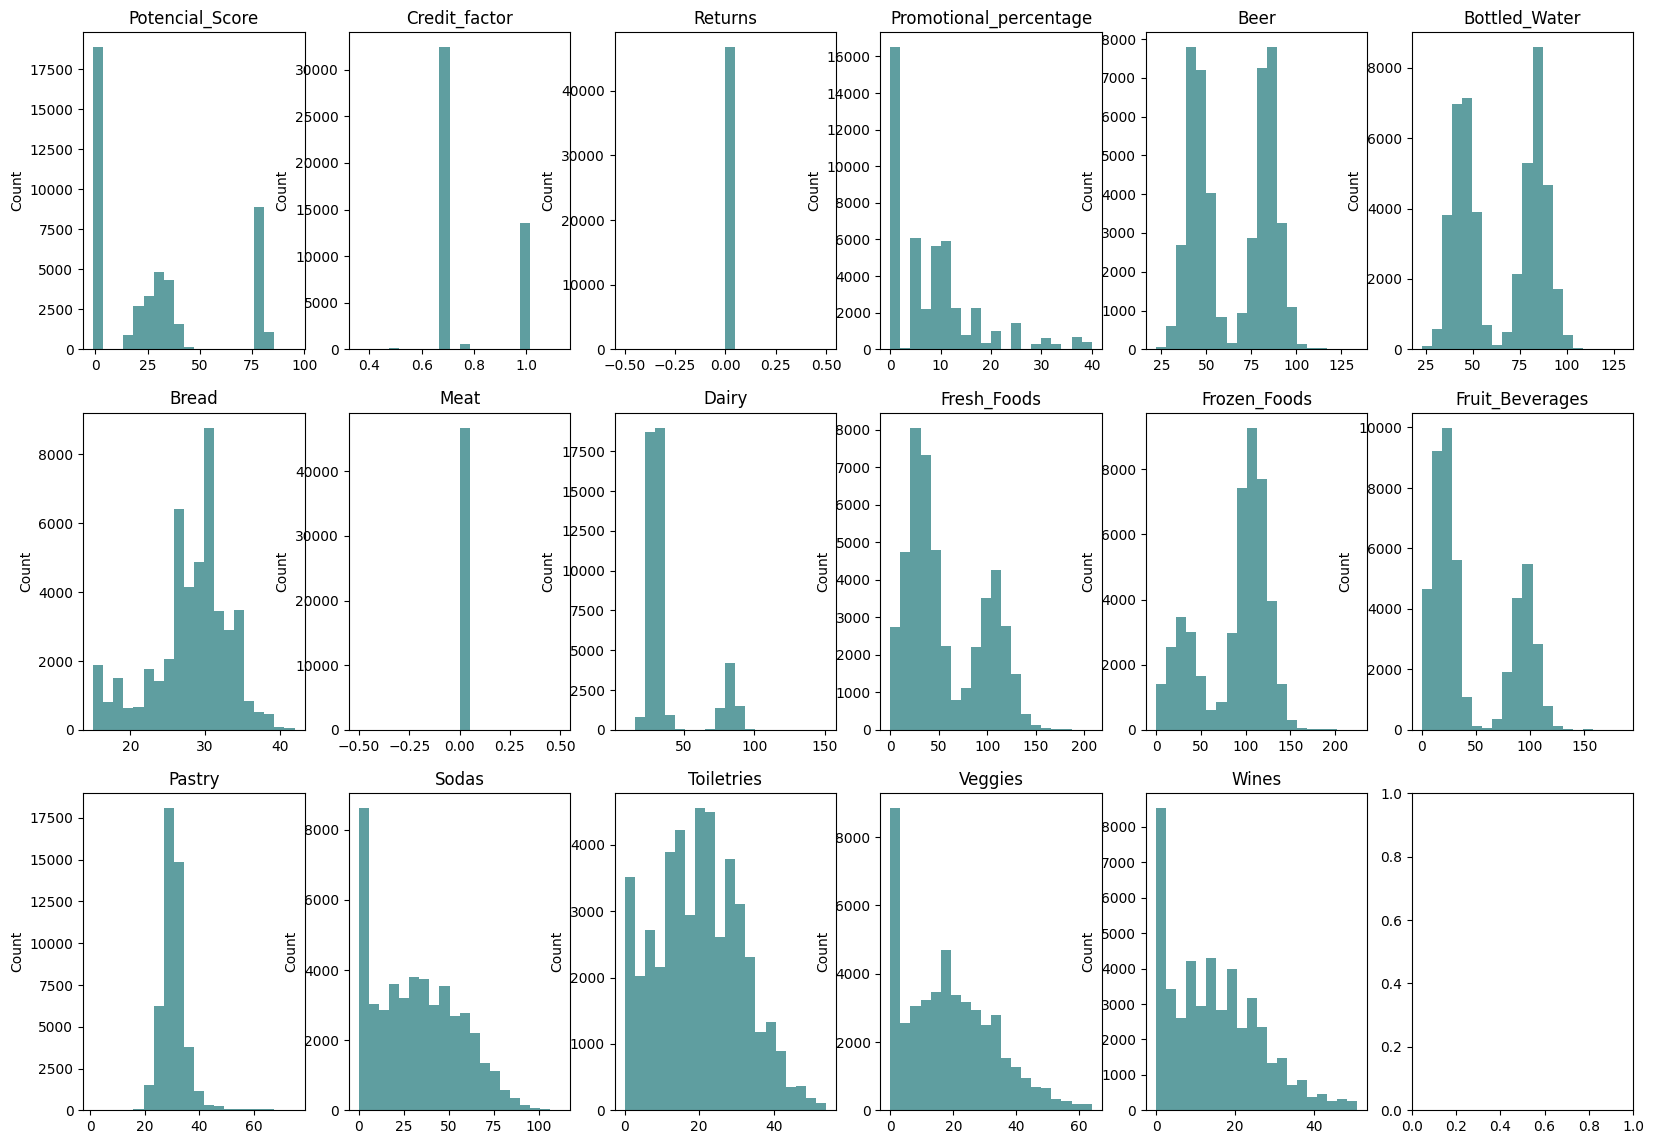

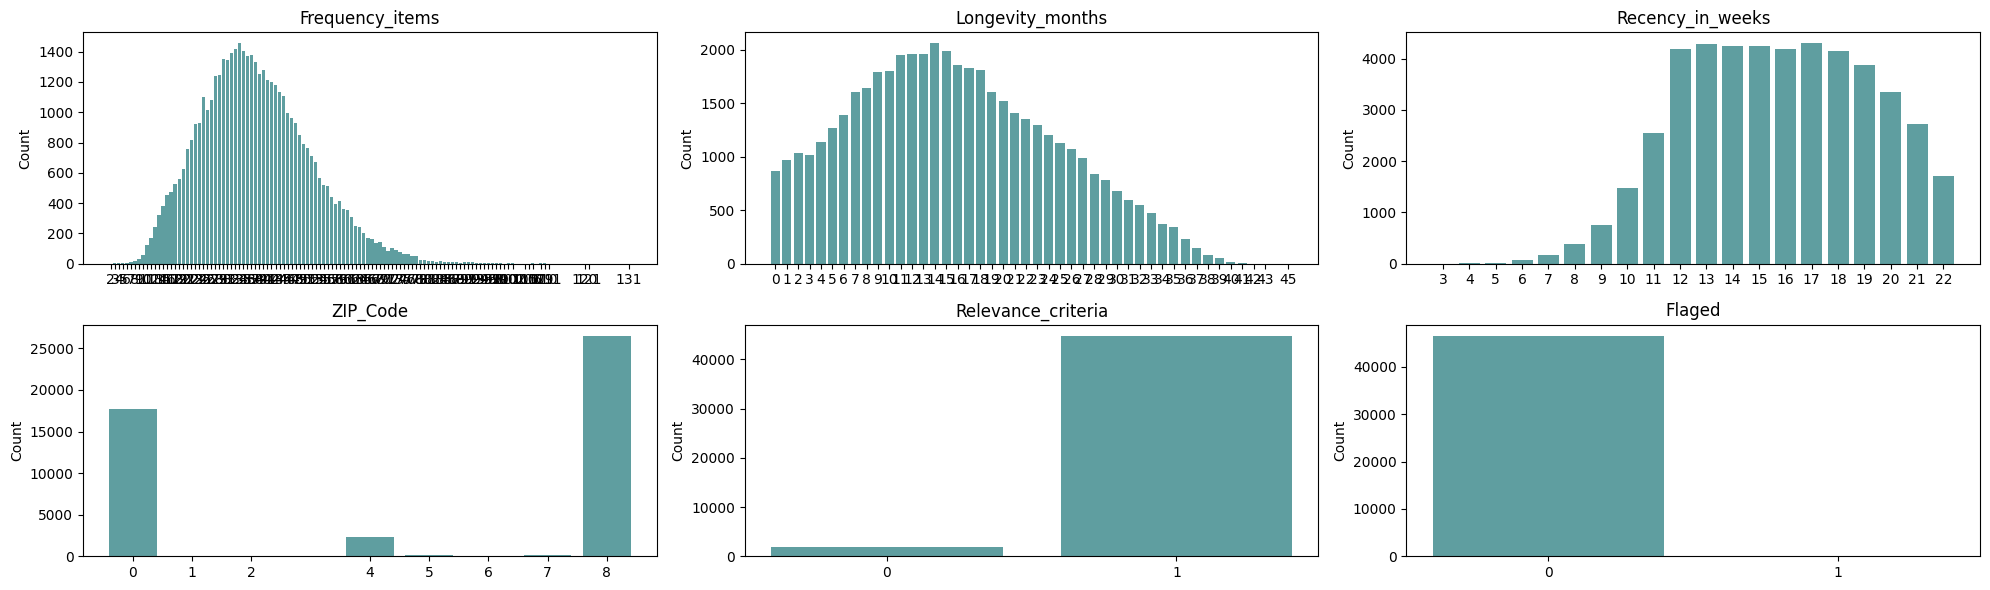

In [ ]:
categorical_columns.remove('Education')
categorical_columns.remove('Gender')

fig_hist, axs_hist = plt.subplots(nrows=3, ncols=6, figsize=(20, 14))
axs_hist = axs_hist.flatten()

fig_bar, axs_bar = plt.subplots(nrows=2, ncols=3, figsize=(20, 6))
axs_bar = axs_bar.flatten()

for i, col in enumerate(numeric_columns):
    plot_histogram(axs_hist[i], data_no_outliers_iqr, col, '')
    axs_hist[i].set_title(col)

for i, col in enumerate(categorical_columns):
    plot_bar_chart(axs_bar[i], data_no_outliers_iqr, col, '')
    axs_bar[i].set_title(col)

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

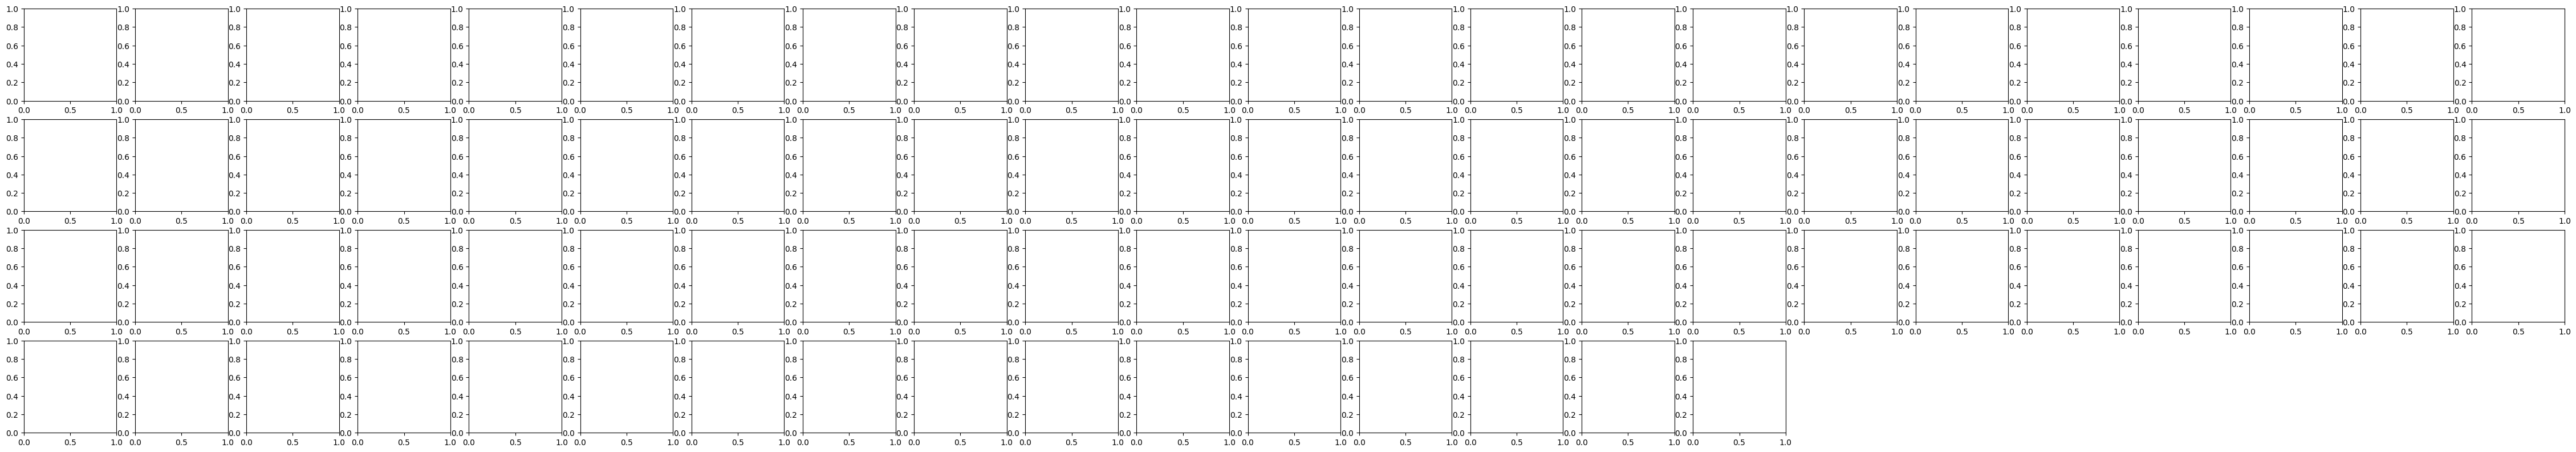

In [ ]:
# Select the columns you want to include in the scatter plots
pairplot_columns = ['Frequency_items', 'Potencial_Score', 'ZIP_Code',
       'Longevity_months', 'Credit_factor', 'Relevance_criteria',
       'Recency_in_weeks', 'Returns', 'Flaged', 'Promotional_percentage',
       'Beer', 'Bottled_Water', 'Bread', 'Meat', 'Dairy', 'Fresh_Foods',
       'Frozen_Foods', 'Fruit_Beverages', 'Pastry', 'Sodas', 'Toiletries',
       'Veggies', 'Wines']

# Create a pairplot
sns.pairplot(data_no_outliers_iqr[pairplot_columns])
plt.show()

# IDs
<a id='ids'></a>

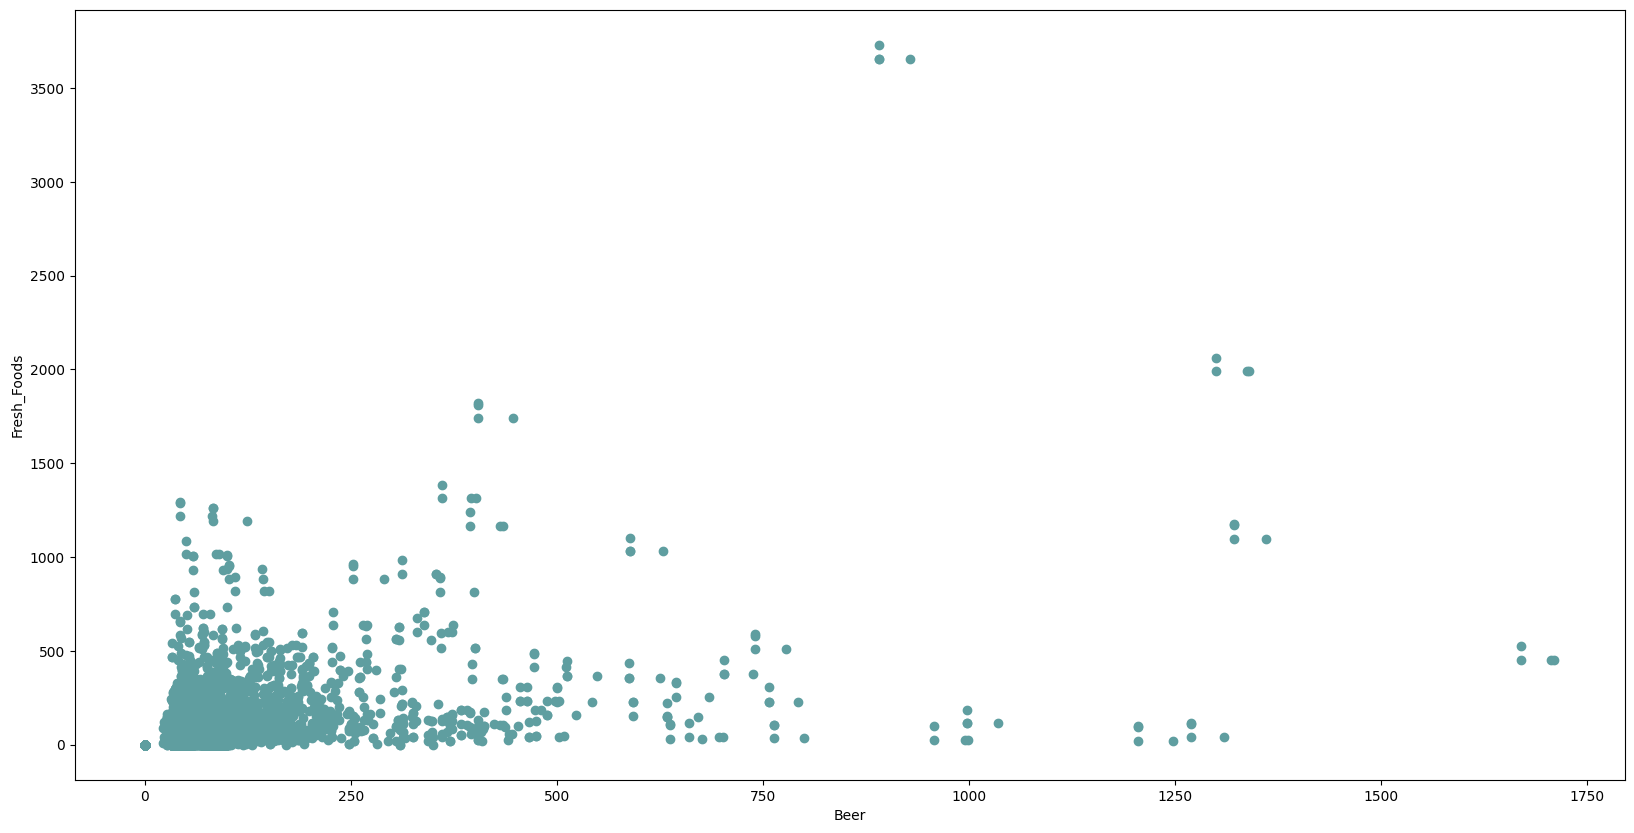

In [ ]:
plot_scatter(plt.subplots()[1], data.drop(data[data['Beer'] > 5000].index), 'Beer', 'Fresh_Foods')

In [ ]:
pd.set_option('display.max_columns', None)
data[(data['Beer'] > 1500) & (data['Beer'] < 1750)]

,ID_Client,Frequency_items,Potencial_Score,Longevity_months,Credit_factor,Relevance_criteria,Recency_in_weeks,Returns,Flaged,Promotional_percentage,Beer,Bottled_Water,Bread,Meat,Dairy,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines
3115,10023562SCO9NKID809,54,78.53,18.0,0.7,1.0,7.0,NaN,0.0,32.0,1670,40,144,57,88,450,44.0,36,110,0,29,30,111
42537,10023562SCO9NKID555,59,78.83,26.0,0.7,1.0,7.0,0.0,0.0,32.0,1710,81,144,57,34,450,119.0,36,30,13,34,26,82
42538,10023562SCO9NKID661,59,80.13,20.0,0.7,1.0,4.0,NaN,0.0,32.0,1706,78,144,57,34,450,125.0,36,30,0,21,22,82
42539,10023562SCO9NKID481,43,79.93,14.0,0.7,1.0,0.0,NaN,0.0,32.0,1670,40,144,57,34,524,44.0,113,30,0,20,22,67


In [ ]:
pd.set_option('display.max_columns', None)
data[(data['Fresh_Foods'] > 3000) & (data['Beer'] < 5000)]

,ID_Client,Frequency_items,Potencial_Score,Longevity_months,Credit_factor,Relevance_criteria,Recency_in_weeks,Returns,Flaged,Promotional_percentage,Beer,Bottled_Water,Bread,Meat,Dairy,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines
19124,9563830SCA6NKID585,39,77.5,19.0,0.0,0.0,8.0,0.0,1.0,0.0,891,52,1127,6771,82,3654,6988.0,624,1393,4303,95,674,359
89512,9563830SCA6NKID342,32,78.9,20.0,0.0,0.0,5.0,0.0,1.0,0.0,891,52,1138,6771,28,3731,7069.0,704,1393,4303,85,677,360
89513,9563830SCA6NKID633,32,78.6,13.0,0.0,0.0,NaN,0.0,1.0,0.0,928,90,1138,6771,28,3654,7063.0,624,1393,4281,86,677,374
89514,9563830SCA6NKID805,27,78.7,17.0,0.0,0.0,NaN,0.0,1.0,0.0,891,52,1138,6771,28,3654,6988.0,624,1474,4255,2,676,361


In [ ]:
data['NumID'] = data['ID_Client'].str.extract(r'^(\d+)')
data['SeqID'] = data['ID_Client'].str.replace(r'^\d+|\d+$', '', regex=True)
data['RepID'] = data['ID_Client'].str.extract(r'(\d+)$')

In [ ]:
data['NumID'].value_counts()

NumID
10153360    8
9337686     4
10557943    4
10223386    4
10468039    4
           ..
917998      2
10359812    2
99830       2
9437209     2
9561327     2
Name: count, Length: 31056, dtype: int64

There are groups of 2, 3 and 4 replicas. There is just one case in which, for some reason there are 8 (but it is 2 groups of 4)

### Check if filling missing values with NumID is an option

For Education:

In [ ]:
# Group by NumID and check unique values of Education
educ_check = data.groupby('NumID')['Education'].apply(lambda x: x.dropna().unique())

# Filter groups with more than one unique value
ambiguous_educ = educ_check[educ_check.apply(lambda x: len(x) > 1)]

# Display the ambiguous groups
print("Groups with ambiguous Education values:")
ambiguous_educ

Groups with ambiguous Education values:


NumID
10153360    [1.0, 4.0]
Name: Education, dtype: object

There is just one value in which there is more than one value of education inside a group of datapoints with the same NumID (it is the one that has 8 datapoints). So, it is possible!

For Gender:

In [ ]:
# Group by NumID and check unique values of Gender
gender_check = data.groupby('NumID')['Gender'].apply(lambda x: x.dropna().unique())

# Filter groups with more than one unique value
ambiguous_gender = gender_check[gender_check.apply(lambda x: len(x) > 1)]

# Display the ambiguous groups
print("Groups with ambiguous Gender values:")
ambiguous_gender

Groups with ambiguous Gender values:


NumID
100036      [1.0, 0.0]
100093      [1.0, 0.0]
10011423    [0.0, 1.0]
10011756    [0.0, 1.0]
10012552    [0.0, 1.0]
               ...    
9974040     [0.0, 1.0]
99772       [1.0, 0.0]
998622      [1.0, 0.0]
998865      [1.0, 0.0]
999721      [0.0, 1.0]
Name: Gender, Length: 4744, dtype: object

There are many values with ambiguity. We can not derive anything for certain based on NumID.

In [ ]:
thresholds = {
    'beer': 2000,
    'bread': 3000,
    'meat': 6000,
    'dairy': 4000,
    'fresh_foods': 3000,
    'frozen_foods': 5000,
    'fruit_beverages': 1700,
    'pastry': 2000,
    'sodas': 5000,
    'toiletries': 500,
    'veggies': 25000,
    'wines': 8000,
    'promotional_percentage': 3000
}

outliers_condition = pd.concat([(data[col] > thresholds[col]) for col in thresholds], axis=1).any(axis=1)

outliers = data[outliers_condition]
data = data[~outliers_condition]

outliers